In [ ]:
!pip install dmba

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import DecisionTreeClassifier
from dmba import classificationSummary, plotDecisionTree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from sklearn.naive_bayes import MultinomialNB
from dmba import classificationSummary
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve)

ModuleNotFoundError: No module named 'dmba'

In [ ]:
df = pd.read_csv('Cleaned_Diabetes_Dataset.csv')

df.info()
df.describe()

# Check missing values
df.isna().sum()

# Peek at data
df.head()

df['Outcome'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


,proportion
Outcome,
0,0.651042
1,0.348958


In [ ]:
# Columns where 0 is biologically invalid and should be replaced
columns_to_fix = ['Glucose', 'BloodPressure', 'BMI','SkinThickness', 'Insulin']

# Replace 0s with NaN temporarily
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Fill NaNs with the median value of each column
for col in columns_to_fix:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
#df['Obese'] = (df['BMI'] >= 30).astype(int)
    # List steps completed
print("Data cleanup completed:")
print(f"- Replaced 0s with median for: {columns_to_fix}")
print("- Left Pregnancies, DiabetesPedigreeFunction, and Age unchanged.")
print("- Created derived feature: Obese (BMI >= 30).")
print("- Outcome column retained as prediction target.")

# View the first few rows
df.head(20)

Data cleanup completed:
- Replaced 0s with median for: ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
- Left Pregnancies, DiabetesPedigreeFunction, and Age unchanged.
- Created derived feature: Obese (BMI >= 30).
- Outcome column retained as prediction target.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
5,5,116.0,74.0,29,125,25.6,0.201,30,0
6,3,78.0,50.0,32,88,31.0,0.248,26,1
7,10,115.0,72.0,29,125,35.3,0.134,29,0
8,2,197.0,70.0,45,543,30.5,0.158,53,1
9,8,125.0,96.0,29,125,32.3,0.232,54,1


In [ ]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"Training set: {train_data.shape[0]} rows")
print(f"Validation set: {val_data.shape[0]} rows")
print(f"Test set: {test_data.shape[0]} rows")

Training set: 268 rows
Validation set: 269 rows
Test set: 231 rows


In [ ]:
majority = train_data[train_data['Outcome'] == 0]
minority = train_data[train_data['Outcome'] == 1]

In [ ]:
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

In [ ]:
train_balanced = pd.concat([minority, majority_downsampled])

In [ ]:
train_balanced = train_balanced.sample(frac=1, random_state=42)

In [ ]:
X_train_bal = train_balanced.drop(columns='Outcome')
y_train_bal = train_balanced['Outcome']

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,125,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,29,125,30.1,0.349,47,1


# Classification Trees (CART)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [ ]:
predictors = ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies']

outcome = 'Outcome'

In [ ]:
#inital parameter guess
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}

In [ ]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 50}


In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005],
    'min_samples_split': [5, 6, 7, 8, 9, 10, 50],
}

In [ ]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)

print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [ ]:
classTree = gridSearch.best_estimator_

classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_val, classTree.predict(X_val))

Confusion Matrix (Accuracy 0.8284)

       Prediction
Actual   0   1
     0 162  13
     1  33  60
Confusion Matrix (Accuracy 0.7249)

       Prediction
Actual   0   1
     0 150  25
     1  49  45


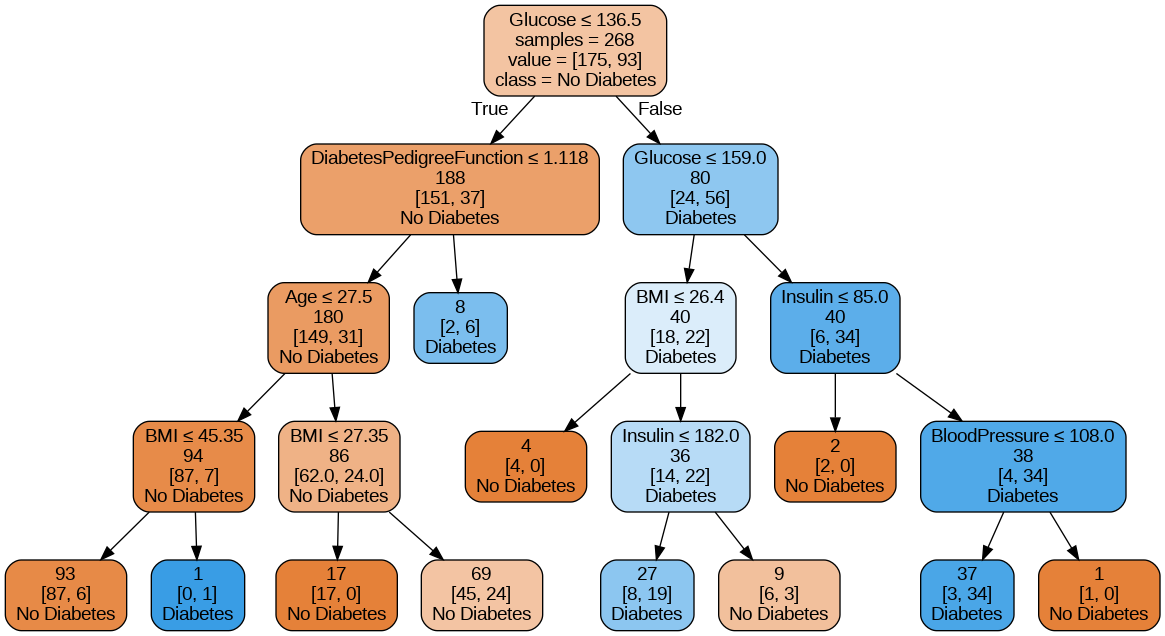

In [ ]:
plotDecisionTree(classTree, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees
    'max_depth': [5, 10, 15, None],              # How deep each tree can grow
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'max_features': ['sqrt', 'log2'],            # Features to consider at each split
}

In [ ]:
gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
print('Best Random Forest Parameters:', gridSearch.best_params_)

Best Random Forest Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rf_model = gridSearch.best_estimator_

classificationSummary(y_train, rf_model.predict(X_train))
classificationSummary(y_val, rf_model.predict(X_val))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 175   0
     1   0  93
Confusion Matrix (Accuracy 0.7361)

       Prediction
Actual   0   1
     0 146  29
     1  42  52


In [ ]:
# 1. Predict probability of being class 1 (diabetes)
y_valid_probs = rf_model.predict_proba(X_val)[:, 1]  # <-- model, not data

# 2. Set custom threshold
threshold = 0.6


# 3. Apply the threshold
y_valid_pred = (y_valid_probs >= threshold).astype(int)

# 4. Evaluate
classificationSummary(y_val, y_valid_pred)

Confusion Matrix (Accuracy 0.7658)

       Prediction
Actual   0   1
     0 167   8
     1  55  39


In [ ]:
boosted_tree = GradientBoostingClassifier(random_state=1)


In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],    # How many trees
    'learning_rate': [0.01, 0.05, 0.1], # How much each tree corrects (lower = slower learning)
    'max_depth': [3, 4, 5],             # How deep each tree can grow
}

In [ ]:
gridSearch = GridSearchCV(boosted_tree, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)

print('Best Boosted Tree Parameters:', gridSearch.best_params_)

Best Boosted Tree Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
boosted_model = gridSearch.best_estimator_

classificationSummary(y_train, boosted_model.predict(X_train))
classificationSummary(y_val, boosted_model.predict(X_val))

Confusion Matrix (Accuracy 0.8769)

       Prediction
Actual   0   1
     0 167   8
     1  25  68
Confusion Matrix (Accuracy 0.7546)

       Prediction
Actual   0   1
     0 155  20
     1  46  48


In [ ]:
# 1. Predict probability of being class 1 (diabetes)
y_valid_probs = boosted_model.predict_proba(X_val)[:, 1]

# 2. Set custom threshold
threshold = 0.5

# 3. Apply the threshold
y_valid_pred = (y_valid_probs >= threshold).astype(int)

# 4. Evaluate
classificationSummary(y_val, y_valid_pred)

Confusion Matrix (Accuracy 0.7546)

       Prediction
Actual   0   1
     0 155  20
     1  46  48


# Naive Bayes

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [ ]:
# Naive Bayes

# Use relevant predictors for diabetes dataset
predictors = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
outcome = 'Outcome'

# Convert categorical outcome to numerical if needed
y = df[outcome]  # If using GaussianNB, the outcome should be numerical:

# Create dummy variables if any categorical predictors are present (not needed
# for diabetes dataset)
X = df[predictors]  # No need for pd.get_dummies here

# Split into training and validation sets ONLY ONCE, with stratify=y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1, stratify=y)

# Run Naive Bayes (GaussianNB is more appropriate for continuous data)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities
predProb_train = nb_model.predict_proba(X_train)
predProb_valid = nb_model.predict_proba(X_valid)

# Predict class membership
y_valid_pred = nb_model.predict(X_valid)

# Evaluate performance (classificationSummary is from dmba)
classificationSummary(y_valid, y_valid_pred)

# predict class membership for training data
y_train_pred = nb_model.predict(X_train)  # Corrected variable name

Confusion Matrix (Accuracy 0.7143)

       Prediction
Actual   0   1
     0 158  43
     1  45  62


In [ ]:
from sklearn.metrics import classification_report

# dmba summary
classificationSummary(y_train, y_train_pred, class_names=['No Diabetes', 'Diabetes'])
classificationSummary(y_valid, y_valid_pred, class_names=['No Diabetes', 'Diabetes'])

# sklearn classification report
print("\n--- Training Classification Report ---")
print(classification_report(y_train, y_train_pred, target_names=['No Diabetes', 'Diabetes']))

print("\n--- Validation Classification Report ---")
print(classification_report(y_valid, y_valid_pred, target_names=['No Diabetes', 'Diabetes']))


Confusion Matrix (Accuracy 0.7717)

            Prediction
     Actual No Diabetes    Diabetes
No Diabetes         252          47
   Diabetes          58         103
Confusion Matrix (Accuracy 0.7143)

            Prediction
     Actual No Diabetes    Diabetes
No Diabetes         158          43
   Diabetes          45          62

--- Training Classification Report ---
              precision    recall  f1-score   support

 No Diabetes       0.81      0.84      0.83       299
    Diabetes       0.69      0.64      0.66       161

    accuracy                           0.77       460
   macro avg       0.75      0.74      0.74       460
weighted avg       0.77      0.77      0.77       460


--- Validation Classification Report ---
              precision    recall  f1-score   support

 No Diabetes       0.78      0.79      0.78       201
    Diabetes       0.59      0.58      0.58       107

    accuracy                           0.71       308
   macro avg       0.68      0.68      

# Regression

## Multiple Linear Regression

In [ ]:
# Add constant for intercept
X_train_bal_const = sm.add_constant(X_train_bal)
X_val_const = sm.add_constant(X_val)
X_test_const = sm.add_constant(X_test)

# Fit OLS model on balanced training set
mlr_model = sm.OLS(y_train_bal, X_train_bal_const).fit()

# Predict on all sets
y_pred_train = mlr_model.predict(X_train_bal_const)
y_pred_val = mlr_model.predict(X_val_const)
y_pred_test = mlr_model.predict(X_test_const)

# Evaluate: MAE, RMSE, R² for all
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_train, rmse_train, r2_train = evaluate(y_train_bal, y_pred_train)
mae_val, rmse_val, r2_val = evaluate(y_val, y_pred_val)
mae_test, rmse_test, r2_test = evaluate(y_test, y_pred_test)

# Print summary and results
print(mlr_model.summary())

print("\nTRAINING SET:")
print(f"MAE: {mae_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

print("\nVALIDATION SET:")
print(f"MAE: {mae_val:.4f} | RMSE: {rmse_val:.4f} | R²: {r2_val:.4f}")

print("\nTEST SET:")
print(f"MAE: {mae_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     12.46
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.14e-14
Time:                        06:06:48   Log-Likelihood:                -93.450
No. Observations:                 186   AIC:                             204.9
Df Residuals:                     177   BIC:                             233.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Logistic Regression

TRAINING SET:
Accuracy: 0.7634 | Balanced Acc: 0.7634 | F1 Score: 0.7528 | AUC: 0.8530


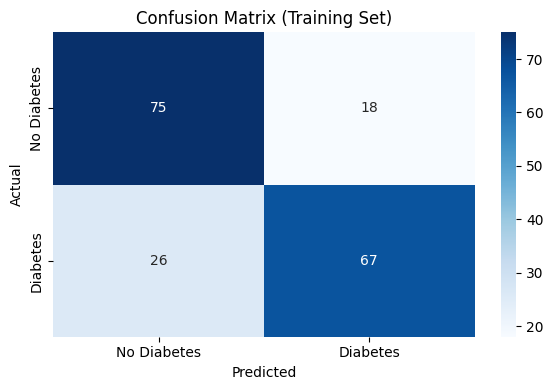


VALIDATION SET:
Accuracy: 0.7658 | Balanced Acc: 0.7486 | F1 Score: 0.6736 | AUC: 0.8350


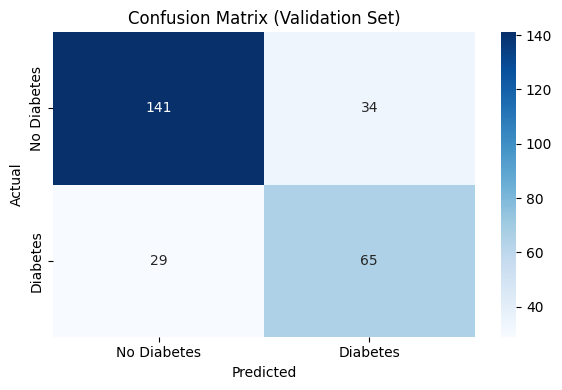


TEST SET:
Accuracy: 0.7446 | Balanced Acc: 0.7323 | F1 Score: 0.6550 | AUC: 0.8359


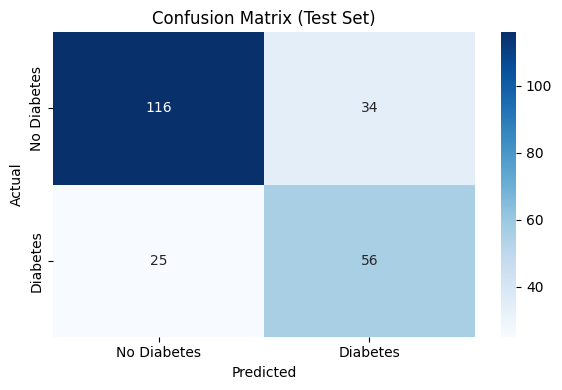

In [ ]:
# --- Assign column names to validation and test sets to match training set ---
X_val = pd.DataFrame(X_val, columns=X_train_bal.columns)
X_test = pd.DataFrame(X_test, columns=X_train_bal.columns)

# --- Train logistic regression model using balanced training data ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)

# --- Prediction ---
y_train_pred = log_model.predict(X_train_bal)
y_val_pred = log_model.predict(X_val)
y_test_pred = log_model.predict(X_test)

# --- Probabilities for AUC ---
y_train_prob = log_model.predict_proba(X_train_bal)[:, 1]
y_val_prob = log_model.predict_proba(X_val)[:, 1]
y_test_prob = log_model.predict_proba(X_test)[:, 1]

# --- Evaluation function ---
def evaluate_classification(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    return acc, bal_acc, f1, auc

# --- Confusion matrix plot ---
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- Evaluate ---
acc_train, bal_train, f1_train, auc_train = evaluate_classification(y_train_bal, y_train_pred, y_train_prob)
acc_val, bal_val, f1_val, auc_val = evaluate_classification(y_val, y_val_pred, y_val_prob)
acc_test, bal_test, f1_test, auc_test = evaluate_classification(y_test, y_test_pred, y_test_prob)

# --- Display Results ---
print("TRAINING SET:")
print(f"Accuracy: {acc_train:.4f} | Balanced Acc: {bal_train:.4f} | F1 Score: {f1_train:.4f} | AUC: {auc_train:.4f}")
plot_confusion_matrix(y_train_bal, y_train_pred, "Confusion Matrix (Training Set)")

print("\nVALIDATION SET:")
print(f"Accuracy: {acc_val:.4f} | Balanced Acc: {bal_val:.4f} | F1 Score: {f1_val:.4f} | AUC: {auc_val:.4f}")
plot_confusion_matrix(y_val, y_val_pred, "Confusion Matrix (Validation Set)")

print("\nTEST SET:")
print(f"Accuracy: {acc_test:.4f} | Balanced Acc: {bal_test:.4f} | F1 Score: {f1_test:.4f} | AUC: {auc_test:.4f}")
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix (Test Set)")


# Logistic Regression Refinement

TRAINING SET:
Accuracy: 0.7688 | Balanced Acc: 0.7688 | F1 Score: 0.7598 | AUC: 0.8407


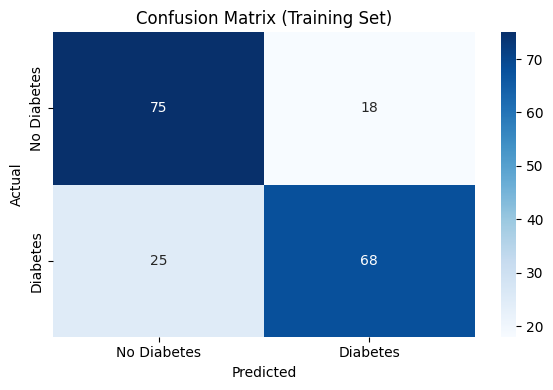


VALIDATION SET:
Accuracy: 0.7472 | Balanced Acc: 0.7245 | F1 Score: 0.6421 | AUC: 0.8134


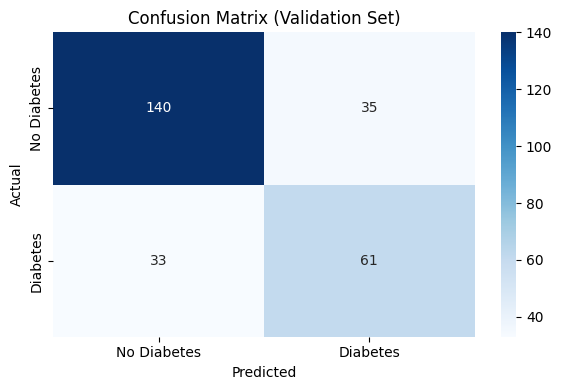


TEST SET:
Accuracy: 0.7229 | Balanced Acc: 0.7100 | F1 Score: 0.6279 | AUC: 0.8145


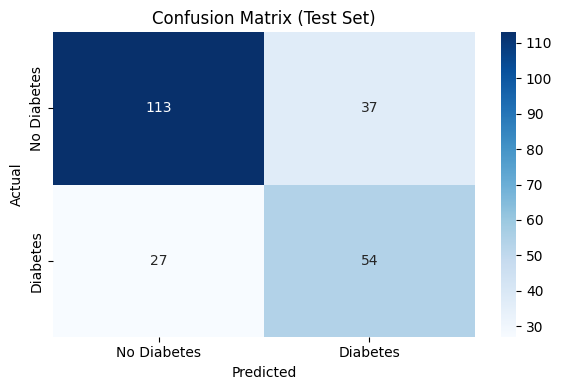

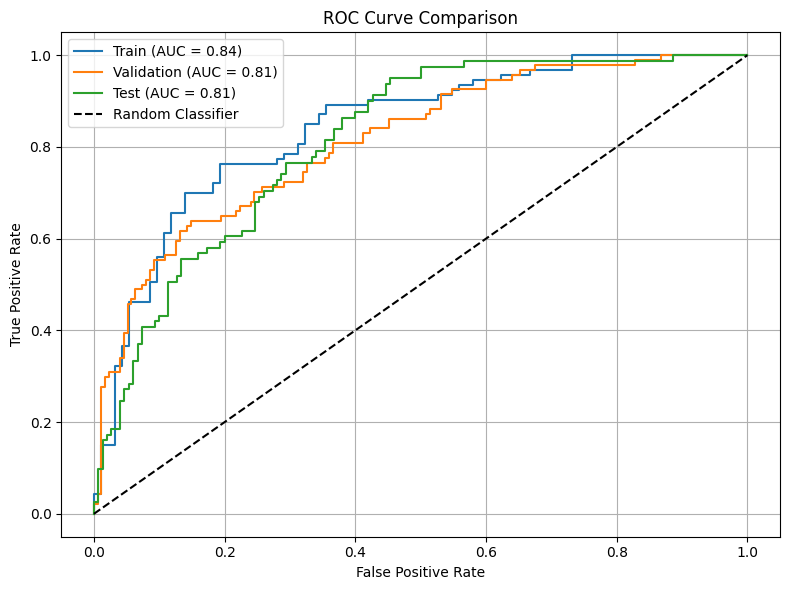


Top Coefficients by Importance:
Glucose                     0.916593
BMI                         0.389388
Pregnancies                 0.027036
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train_bal_scaled, y_train_bal)
log_model = grid_search.best_estimator_

# Predict
y_train_pred = log_model.predict(X_train_bal_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Predict probabilities
y_train_prob = log_model.predict_proba(X_train_bal_scaled)[:, 1]
y_val_prob = log_model.predict_proba(X_val_scaled)[:, 1]
y_test_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation function
def evaluate_classification(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    return acc, bal_acc, f1, auc

# Confusion matrix plotting
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ROC curve plotting
def plot_roc(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Evaluate
acc_train, bal_train, f1_train, auc_train = evaluate_classification(y_train_bal, y_train_pred, y_train_prob)
acc_val, bal_val, f1_val, auc_val = evaluate_classification(y_val, y_val_pred, y_val_prob)
acc_test, bal_test, f1_test, auc_test = evaluate_classification(y_test, y_test_pred, y_test_prob)

# Print results
print("TRAINING SET:")
print(f"Accuracy: {acc_train:.4f} | Balanced Acc: {bal_train:.4f} | F1 Score: {f1_train:.4f} | AUC: {auc_train:.4f}")
plot_confusion_matrix(y_train_bal, y_train_pred, "Confusion Matrix (Training Set)")

print("\nVALIDATION SET:")
print(f"Accuracy: {acc_val:.4f} | Balanced Acc: {bal_val:.4f} | F1 Score: {f1_val:.4f} | AUC: {auc_val:.4f}")
plot_confusion_matrix(y_val, y_val_pred, "Confusion Matrix (Validation Set)")

print("\nTEST SET:")
print(f"Accuracy: {acc_test:.4f} | Balanced Acc: {bal_test:.4f} | F1 Score: {f1_test:.4f} | AUC: {auc_test:.4f}")
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix (Test Set)")

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plot_roc(y_train_bal, y_train_prob, "Train")
plot_roc(y_val, y_val_prob, "Validation")
plot_roc(y_test, y_test_prob, "Test")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Display best logistic regression coefficients
print("\nTop Coefficients by Importance:")
feature_names = X_train_bal.columns
coeffs = pd.Series(log_model.coef_[0], index=feature_names)
print(coeffs.sort_values(key=abs, ascending=False).head(10))


# Clustering Analysis

## Data Cleaning for Clustering

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_cluster = pd.read_csv('Cleaned_Diabetes_Dataset.csv')

print(f"Dataset dimensions: {df_cluster.shape[0]} rows and {df_cluster.shape[1]} columns")

# First, split the data into train (70%) and temp (30%) maintaining stratification
X = df_cluster.drop(columns=['Outcome'])
y = df_cluster['Outcome']

# First split: 70% train, 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Second split: Split the temporary set into validation (50%) and test (50%)
# This gives us 15% validation and 15% test of the original data
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Combine X and y back together for each set
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"Train set: {train_data.shape[0]} samples ({train_data.shape[0]/len(df_cluster)*100:.1f}%)")
print(f"Validation set: {val_data.shape[0]} samples ({val_data.shape[0]/len(df_cluster)*100:.1f}%)")
print(f"Test set: {test_data.shape[0]} samples ({test_data.shape[0]/len(df_cluster)*100:.1f}%)")

# Verify stratification
print("\nClass distribution:")
print(f"Train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Validation: {y_val.value_counts(normalize=True).round(3).to_dict()}")
print(f"Test: {y_test.value_counts(normalize=True).round(3).to_dict()}")
print(f"Original: {y.value_counts(normalize=True).round(3).to_dict()}")

# Process the training data for clustering
print("\n--- Processing Training Data for Clustering ---")

# Select features for clustering (exclude outcome variable)
train_features = train_data.drop(columns=['Outcome'])
train_outcome = train_data['Outcome']

# Convert data to float64 for consistency
train_features = train_features.astype('float64')

# Check for missing values in training data
missing_values = train_features.isna().sum()
features_with_nans = missing_values[missing_values > 0]

if len(features_with_nans) > 0:
    print(f"\nDetected missing values in {len(features_with_nans)} features:")
    for feature, count in features_with_nans.items():
        print(f"- {feature}: {count} missing values ({count/len(train_features):.2%})")

    # Simple imputation with median for any remaining missing values
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    train_features_clean = pd.DataFrame(
        imputer.fit_transform(train_features),
        columns=train_features.columns,
        index=train_features.index
    )
else:
    print("No missing values detected in the training data.")
    train_features_clean = train_features

# Fit the scaler on training data only
scaler = StandardScaler()
train_features_scaled = pd.DataFrame(
    scaler.fit_transform(train_features_clean),
    columns=train_features_clean.columns,
    index=train_features_clean.index
)

# Transform validation and test data using the same scaler
val_features = val_data.drop(columns=['Outcome']).astype('float64')
test_features = test_data.drop(columns=['Outcome']).astype('float64')

# Apply the same imputation if needed
if len(features_with_nans) > 0:
    val_features_clean = pd.DataFrame(
        imputer.transform(val_features),
        columns=val_features.columns,
        index=val_features.index
    )
    test_features_clean = pd.DataFrame(
        imputer.transform(test_features),
        columns=test_features.columns,
        index=test_features.index
    )
else:
    val_features_clean = val_features
    test_features_clean = test_features

# Scale validation and test data using the same scaler
val_features_scaled = pd.DataFrame(
    scaler.transform(val_features_clean),
    columns=val_features_clean.columns,
    index=val_features_clean.index
)

test_features_scaled = pd.DataFrame(
    scaler.transform(test_features_clean),
    columns=test_features_clean.columns,
    index=test_features_clean.index
)

# Store outcomes
val_outcome = val_data['Outcome']
test_outcome = test_data['Outcome']

# Convert to arrays for clustering
train_array = train_features_scaled.values
val_array = val_features_scaled.values
test_array = test_features_scaled.values

# Calculate baseline diabetes rates
train_diabetes_rate = train_outcome.mean()
val_diabetes_rate = val_outcome.mean()
test_diabetes_rate = test_outcome.mean()
overall_diabetes_rate = y.mean()

print(f"\nDiabetes rates:")
print(f"Training: {train_diabetes_rate:.3f}")
print(f"Validation: {val_diabetes_rate:.3f}")
print(f"Test: {test_diabetes_rate:.3f}")
print(f"Overall: {overall_diabetes_rate:.3f}")

# Create a dictionary to store all processed data
processed_data = {
    'train': {
        'features_scaled': train_features_scaled,
        'array': train_array,
        'outcome': train_outcome,
        'diabetes_rate': train_diabetes_rate
    },
    'validation': {
        'features_scaled': val_features_scaled,
        'array': val_array,
        'outcome': val_outcome,
        'diabetes_rate': val_diabetes_rate
    },
    'test': {
        'features_scaled': test_features_scaled,
        'array': test_array,
        'outcome': test_outcome,
        'diabetes_rate': test_diabetes_rate
    },
    'scaler': scaler,
    'overall_diabetes_rate': overall_diabetes_rate
}

print("\nData preprocessing completed successfully!")
print(f"Training samples: {len(train_array)}")
print(f"Validation samples: {len(val_array)}")
print(f"Test samples: {len(test_array)}")

Dataset dimensions: 768 rows and 9 columns
Train set: 537 samples (69.9%)
Validation set: 115 samples (15.0%)
Test set: 116 samples (15.1%)

Class distribution:
Train: {0: 0.652, 1: 0.348}
Validation: {0: 0.652, 1: 0.348}
Test: {0: 0.647, 1: 0.353}
Original: {0: 0.651, 1: 0.349}

--- Processing Training Data for Clustering ---

Detected missing values in 3 features:
- Glucose: 3 missing values (0.56%)
- BloodPressure: 23 missing values (4.28%)
- BMI: 8 missing values (1.49%)

Diabetes rates:
Training: 0.348
Validation: 0.348
Test: 0.353
Overall: 0.349

Data preprocessing completed successfully!
Training samples: 537
Validation samples: 115
Test samples: 116


In [ ]:
test_features_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
83,-1.160056,-0.687220,-0.593592,-0.107425,-0.163932,-1.192280,-0.727079,-0.980274
347,-0.263725,-0.185947,-0.018660,0.013767,-0.163932,-1.355864,-0.876359,-0.895411
52,0.333829,-1.121657,-0.511459,-0.955764,-1.444482,-1.222022,-0.413592,-0.301368
650,-0.861279,-1.021402,-1.497058,-0.470999,-0.477792,-1.103052,-0.736036,-0.895411
300,-1.160056,1.518382,-0.018660,0.013767,-0.163932,-0.047189,1.070251,-0.301368


## Hierarchical Clustering w/ Multiple Linkage Methods



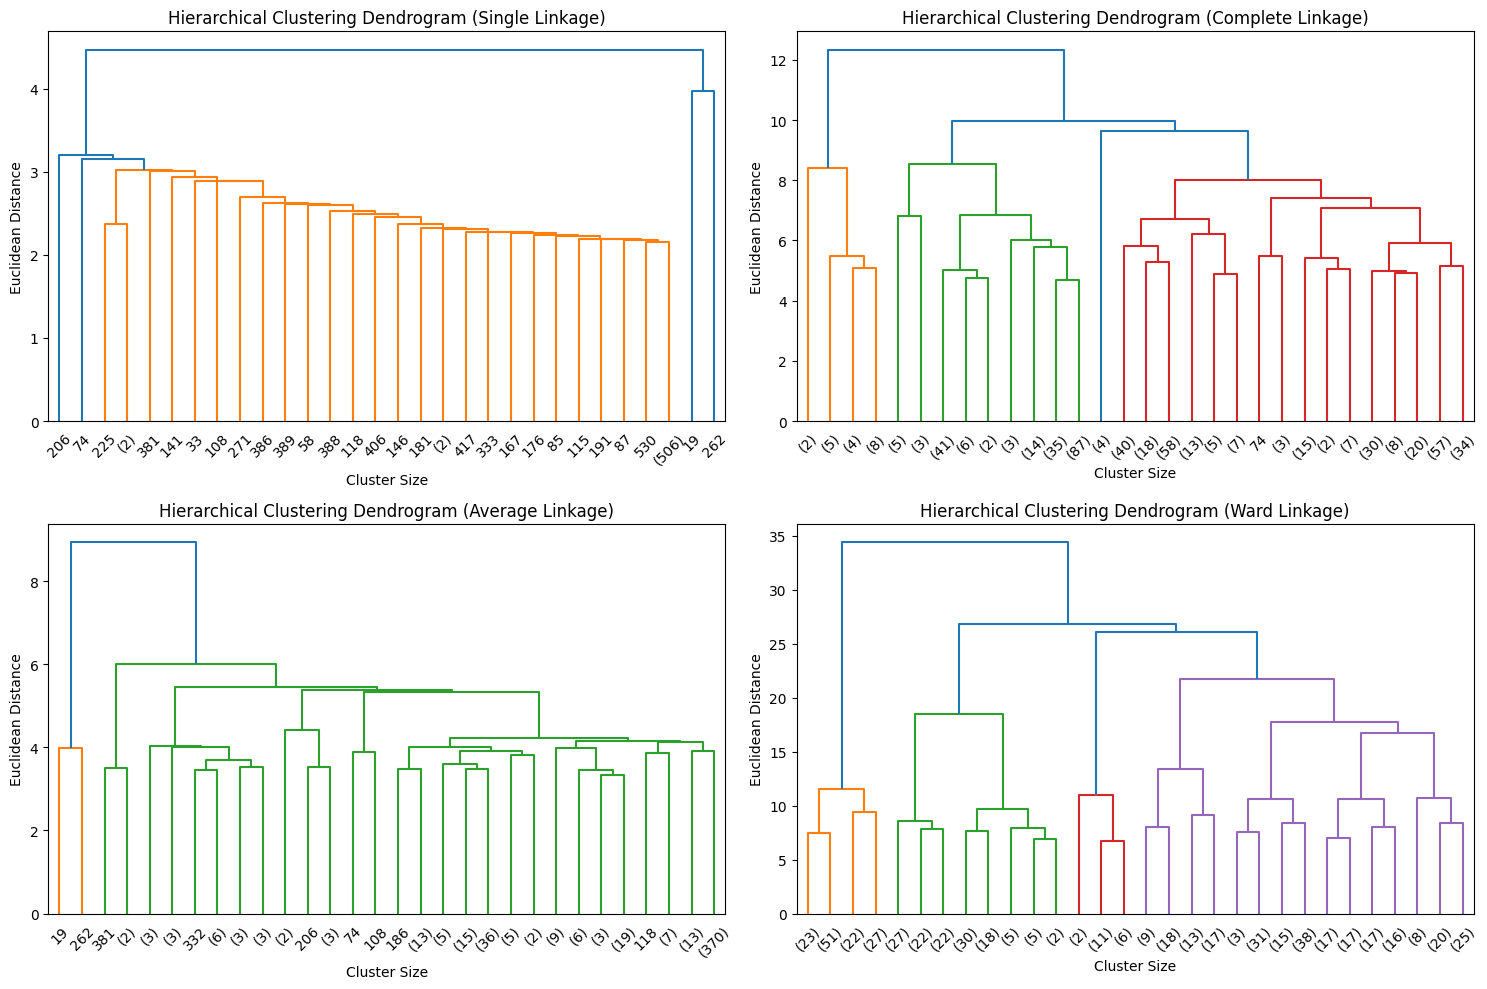

In [ ]:
# Compare different linkage methods using training data only
methods = ['single', 'complete', 'average', 'ward']
linkage_results = {}

plt.figure(figsize=(15, 10))
for idx, method in enumerate(methods):
    plt.subplot(2, 2, idx + 1)
    # Calculate linkage matrix using training data
    linkage_matrix = linkage(processed_data['train']['array'], method=method, metric='euclidean')
    linkage_results[method] = linkage_matrix

    # Create dendrogram with truncation
    dendrogram(
        linkage_matrix,
        truncate_mode='lastp',
        p=30,
        leaf_rotation=45
    )
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Cluster Size')
    plt.ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

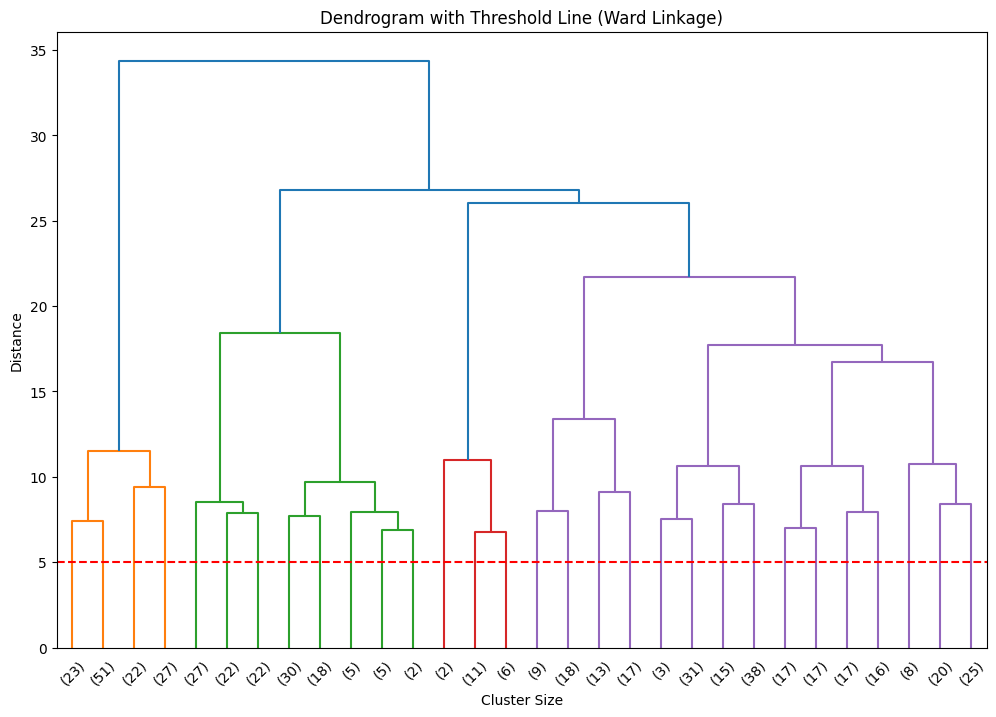

Number of clusters formed with threshold 5: 47

Exploring how threshold affects cluster count:
Threshold 2: 212 clusters
Threshold 3: 118 clusters
Threshold 4: 74 clusters
Threshold 5: 47 clusters
Threshold 6: 37 clusters
Threshold 7: 28 clusters
Threshold 8: 20 clusters


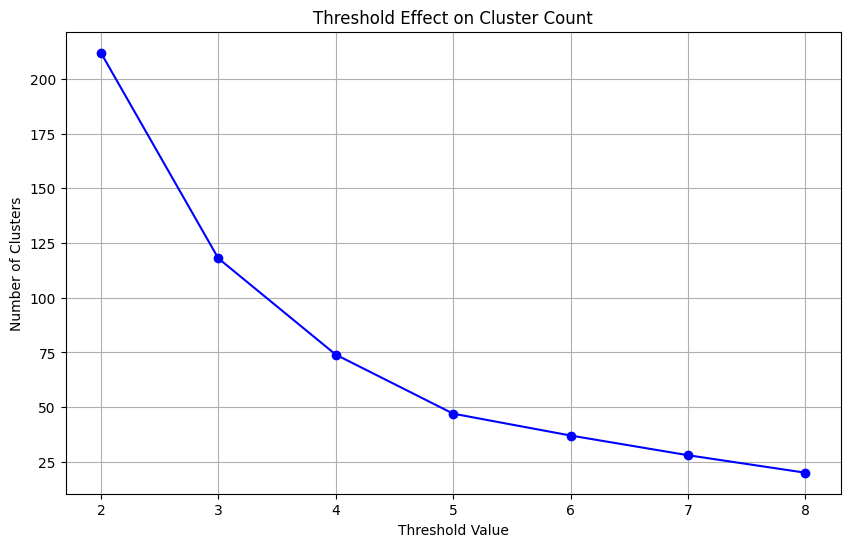


Cluster assignments complete:
Training samples: 537
Validation samples: 115
Test samples: 116


In [ ]:
selected_method = 'ward'
linkage_matrix = linkage_results[selected_method]

# Plot dendrogram with threshold line
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=45
)

# Selected threshold
threshold = 5
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title(f"Dendrogram with Threshold Line ({selected_method.capitalize()} Linkage)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Generate clusters for training data
train_cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
num_clusters = len(np.unique(train_cluster_labels))
print(f"Number of clusters formed with threshold {threshold}: {num_clusters}")

# Try different thresholds on training data
print("\nExploring how threshold affects cluster count:")
threshold_values = [2, 3, 4, 5, 6, 7, 8]
cluster_counts = []

for thresh in threshold_values:
    clusters = fcluster(linkage_matrix, thresh, criterion='distance')
    num_clust = len(np.unique(clusters))
    cluster_counts.append(num_clust)
    print(f"Threshold {thresh}: {num_clust} clusters")

# Visualize the relationship between threshold and cluster count
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, cluster_counts, 'bo-')
plt.xlabel('Threshold Value')
plt.ylabel('Number of Clusters')
plt.title('Threshold Effect on Cluster Count')
plt.grid(True)
plt.show()

# Apply the clustering model to validation and test data

def assign_to_nearest_cluster(new_data, train_data, train_labels):
    """
    Assign new data points to the nearest cluster based on training centroids
    """
    from sklearn.metrics.pairwise import euclidean_distances

    # Calculate cluster centroids from training data
    centroids = []
    unique_labels = np.unique(train_labels)

    for label in unique_labels:
        cluster_points = train_data[train_labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    centroids = np.array(centroids)

    # Calculate distances from new points to centroids
    distances = euclidean_distances(new_data, centroids)

    # Assign to nearest centroid
    new_labels = unique_labels[np.argmin(distances, axis=1)]

    return new_labels

# Apply clustering to validation and test sets
val_cluster_labels = assign_to_nearest_cluster(
    processed_data['validation']['array'],
    processed_data['train']['array'],
    train_cluster_labels
)

test_cluster_labels = assign_to_nearest_cluster(
    processed_data['test']['array'],
    processed_data['train']['array'],
    train_cluster_labels
)

# Create dataframes with cluster assignments
train_with_clusters = processed_data['train']['features_scaled'].copy()
train_with_clusters['Outcome'] = processed_data['train']['outcome']
train_with_clusters['Hierarchical_Cluster'] = train_cluster_labels

val_with_clusters = processed_data['validation']['features_scaled'].copy()
val_with_clusters['Outcome'] = processed_data['validation']['outcome']
val_with_clusters['Hierarchical_Cluster'] = val_cluster_labels

test_with_clusters = processed_data['test']['features_scaled'].copy()
test_with_clusters['Outcome'] = processed_data['test']['outcome']
test_with_clusters['Hierarchical_Cluster'] = test_cluster_labels

print(f"\nCluster assignments complete:")
print(f"Training samples: {len(train_cluster_labels)}")
print(f"Validation samples: {len(val_cluster_labels)}")
print(f"Test samples: {len(test_cluster_labels)}")

In [ ]:
def analyze_hierarchical_clusters(data_with_clusters, original_features=None, scaler=None):
   """
   Analyze hierarchical clusters to understand their characteristics
   """
   import pandas as pd
   import numpy as np

   # Get feature columns (exclude Outcome and Hierarchical_Cluster)
   feature_cols = [col for col in data_with_clusters.columns
                  if col not in ['Outcome', 'Hierarchical_Cluster']]

   # Get unique clusters
   clusters = sorted(data_with_clusters['Hierarchical_Cluster'].unique())

   # Calculate statistics for each cluster
   cluster_stats = []

   for cluster in clusters:
       cluster_data = data_with_clusters[data_with_clusters['Hierarchical_Cluster'] == cluster]
       size = len(cluster_data)

       # Skip small clusters
       if size < 5:
           continue

       # Calculate diabetes rate
       diabetes_rate = cluster_data['Outcome'].mean() if 'Outcome' in cluster_data.columns else np.nan

       # Calculate feature means
       for feature in feature_cols:
           # Get feature values
           values = cluster_data[feature].values

           # Convert to original scale if scaler is provided
           if scaler is not None and original_features is not None:
               # Get feature index in original data
               if feature in original_features.columns:
                   # Get mean from original data directly
                   orig_values = original_features.loc[cluster_data.index, feature].values
                   mean_val = np.mean(orig_values)
               else:
                   # Use scaler to convert scaled values back to original
                   feat_idx = list(feature_cols).index(feature)
                   zeros = np.zeros((len(values), len(feature_cols)))
                   zeros[:, feat_idx] = values
                   orig_values = scaler.inverse_transform(zeros)[:, feat_idx]
                   mean_val = np.mean(orig_values)
           else:
               mean_val = np.mean(values)

           cluster_stats.append({
               'Cluster': cluster,
               'Feature': feature,
               'Mean': mean_val,
               'Cluster_Size': size,
               'Diabetes_Rate': diabetes_rate
           })

   # Convert to DataFrame
   stats_df = pd.DataFrame(cluster_stats)

   # Create pivot table for heatmap
   heatmap_data = stats_df.pivot_table(
       index='Cluster',
       columns='Feature',
       values='Mean'
   )

   # Add diabetes rate and cluster size
   diabetes_rates = stats_df.drop_duplicates('Cluster')[['Cluster', 'Diabetes_Rate', 'Cluster_Size']]
   diabetes_rates = diabetes_rates.set_index('Cluster')

   # Combine data
   combined_data = pd.concat([heatmap_data, diabetes_rates], axis=1)

   # 3. Feature importance calculation
   feature_importance = {}

   for feature in feature_cols:
       # Get cluster means for this feature
       feature_means = stats_df[stats_df['Feature'] == feature].groupby('Cluster')['Mean'].mean().values

       # Calculate between-cluster variance
       between_variance = np.var(feature_means) if len(feature_means) > 1 else 0

       # Calculate within-cluster variance
       within_variances = []
       for cluster in clusters:
           cluster_data = data_with_clusters[data_with_clusters['Hierarchical_Cluster'] == cluster]
           if len(cluster_data) > 1:  # Need at least 2 samples
               within_variances.append(np.var(cluster_data[feature].values))

       # Calculate mean within-cluster variance
       mean_within_var = np.mean(within_variances) if within_variances else 0

       # Calculate F-ratio (higher = better separation)
       f_ratio = between_variance / mean_within_var if mean_within_var > 0 else float('inf')
       feature_importance[feature] = f_ratio

   # Convert to DataFrame and sort
   importance_df = pd.DataFrame({
       'Feature': list(feature_importance.keys()),
       'Importance': list(feature_importance.values())
   }).sort_values('Importance', ascending=False)

   # Display overall insights
   print("\n=== HIERARCHICAL CLUSTERING INSIGHTS ===\n")

   # Most important features
   print("Top 5 cluster-defining features:")
   for i, (feature, importance) in enumerate(zip(importance_df['Feature'].iloc[:5],
                                              importance_df['Importance'].iloc[:5])):
       print(f"  {i+1}. {feature} (importance: {importance:.2f})")

   # High-risk clusters
   high_risk = diabetes_rates.sort_values('Diabetes_Rate', ascending=False).head(3)
   print("\nHigh-risk clusters:")
   for cluster, row in high_risk.iterrows():
       print(f"  Cluster {cluster}: {row['Diabetes_Rate']:.1%} diabetes rate (n={row['Cluster_Size']})")

       # Get top 3 highest feature values
       cluster_means = heatmap_data.loc[cluster]
       top_features = cluster_means.sort_values(ascending=False).head(3)
       print(f"    Top features: {', '.join([f'{f}: {v:.1f}' for f, v in top_features.items()])}")

   # Low-risk clusters
   low_risk = diabetes_rates.sort_values('Diabetes_Rate').head(3)
   print("\nLow-risk clusters:")
   for cluster, row in low_risk.iterrows():
       print(f"  Cluster {cluster}: {row['Diabetes_Rate']:.1%} diabetes rate (n={row['Cluster_Size']})")

       # Get bottom 3 feature values
       cluster_means = heatmap_data.loc[cluster]
       bottom_features = cluster_means.sort_values().head(3)
       print(f"    Bottom features: {', '.join([f'{f}: {v:.1f}' for f, v in bottom_features.items()])}")

# Run the analysis on training data
analyze_hierarchical_clusters(
   data_with_clusters=train_with_clusters,
   original_features=df[processed_data['train']['features_scaled'].columns],  # Original unscaled features
   scaler=processed_data['scaler']  # The scaler used in preprocessing
)


=== HIERARCHICAL CLUSTERING INSIGHTS ===

Top 5 cluster-defining features:
  1. Insulin (importance: 16249.35)
  2. Glucose (importance: 2222.06)
  3. Age (importance: 515.35)
  4. BloodPressure (importance: 275.94)
  5. SkinThickness (importance: 188.77)

High-risk clusters:
  Cluster 26: 85.7% diabetes rate (n=7.0)
    Top features: Glucose: 160.4, Insulin: 124.3, BloodPressure: 81.9
  Cluster 21: 83.3% diabetes rate (n=6.0)
    Top features: Insulin: 464.2, Glucose: 155.5, BloodPressure: 73.3
  Cluster 30: 83.3% diabetes rate (n=12.0)
    Top features: Glucose: 167.2, Insulin: 149.0, BloodPressure: 85.2

Low-risk clusters:
  Cluster 2: 0.0% diabetes rate (n=16.0)
    Bottom features: DiabetesPedigreeFunction: 0.2, Pregnancies: 1.3, BMI: 24.0
  Cluster 4: 0.0% diabetes rate (n=22.0)
    Bottom features: DiabetesPedigreeFunction: 0.4, Pregnancies: 1.7, SkinThickness: 15.7
  Cluster 35: 0.0% diabetes rate (n=15.0)
    Bottom features: DiabetesPedigreeFunction: 0.2, Pregnancies: 3.3, A

## K-Means Clustering w/ Elbow Method


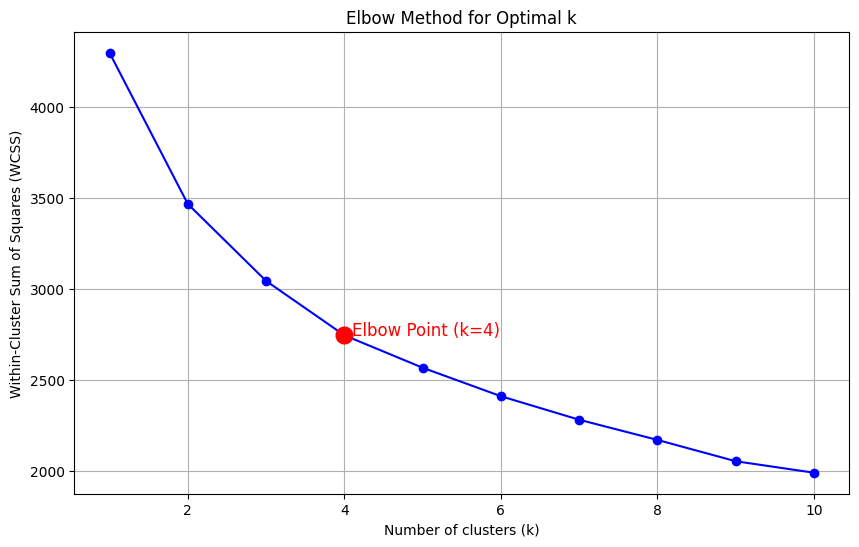


Based on the elbow method, k=4 appears to be optimal.

Cluster centroids in original scale:
         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Cluster                                                                       
0               2.14   106.35          66.12          22.71   108.17  27.87   
1               7.25   130.91          77.38          29.58   131.72  32.03   
2               4.62   166.45          72.62          34.31   396.93  36.29   
3               2.07   121.41          74.00          34.91   132.82  38.64   

         DiabetesPedigreeFunction    Age  
Cluster                                   
0                            0.43  25.70  
1                            0.45  45.56  
2                            0.72  37.93  
3                            0.54  28.85  


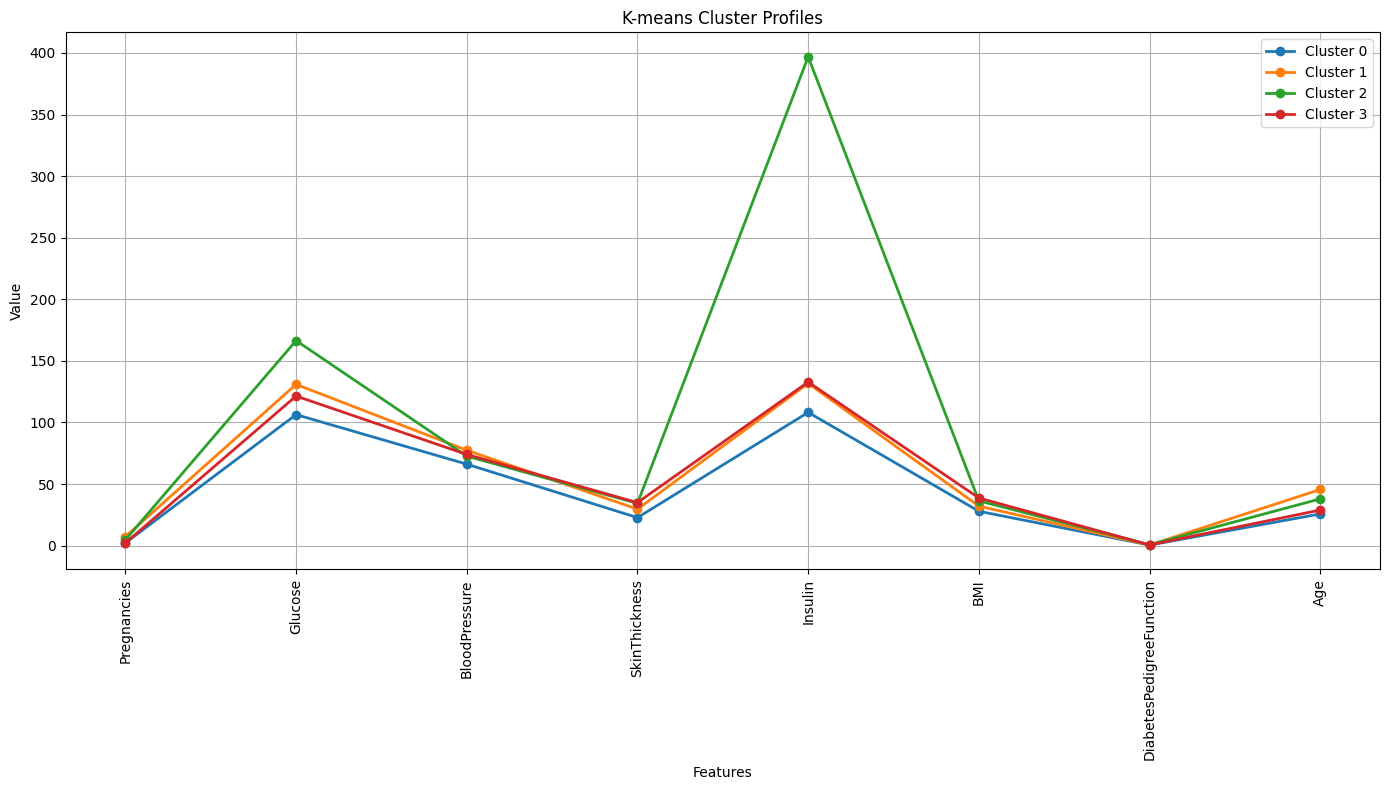


Cluster assignments:
Training samples: 537
Validation samples: 115
Test samples: 116

Cluster distribution in each dataset:
Training:
0    189
1    171
2     29
3    148
Name: count, dtype: int64

Validation:
0    40
1    32
2     9
3    34
Name: count, dtype: int64

Test:
0    46
1    33
2     9
3    28
Name: count, dtype: int64


In [ ]:
# Compute WCSS for different numbers of clusters using training data
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_data['train']['array'])
    wcss.append(kmeans.inertia_)

# Calculate percentage decrease in WCSS
wcss_decrease = [0]  # No decrease for k=1
for i in range(1, len(wcss)):
    decrease = ((wcss[i-1] - wcss[i]) / wcss[i-1]) * 100
    wcss_decrease.append(decrease)

# Plot elbow curve with annotations
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Identify elbow point
elbow_point = 4  # Adjust based on visual inspection
plt.plot(elbow_point, wcss[elbow_point-1], 'ro', markersize=12)
plt.text(elbow_point + 0.1, wcss[elbow_point-1], f'Elbow Point (k={elbow_point})',
         fontsize=12, color='red')

plt.grid(True)
plt.show()

print(f"\nBased on the elbow method, k={elbow_point} appears to be optimal.")

# Apply K-means with the optimal number of clusters
optimal_k = elbow_point
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit on training data
kmeans_final.fit(processed_data['train']['array'])

# Predict clusters for all datasets
train_kmeans_labels = kmeans_final.predict(processed_data['train']['array'])
val_kmeans_labels = kmeans_final.predict(processed_data['validation']['array'])
test_kmeans_labels = kmeans_final.predict(processed_data['test']['array'])

# Add cluster labels to respective dataframes
train_with_kmeans = processed_data['train']['features_scaled'].copy()
train_with_kmeans['Outcome'] = processed_data['train']['outcome']
train_with_kmeans['KMeans_Cluster'] = train_kmeans_labels

val_with_kmeans = processed_data['validation']['features_scaled'].copy()
val_with_kmeans['Outcome'] = processed_data['validation']['outcome']
val_with_kmeans['KMeans_Cluster'] = val_kmeans_labels

test_with_kmeans = processed_data['test']['features_scaled'].copy()
test_with_kmeans['Outcome'] = processed_data['test']['outcome']
test_with_kmeans['KMeans_Cluster'] = test_kmeans_labels

# Examine cluster centroids in original scale
centroids_scaled = kmeans_final.cluster_centers_

# Convert centroids back to original scale
centroids = processed_data['scaler'].inverse_transform(centroids_scaled)
feature_columns = processed_data['train']['features_scaled'].columns
centroids_df = pd.DataFrame(centroids, columns=feature_columns)
centroids_df.index.name = "Cluster"

print("\nCluster centroids in original scale:")
print(centroids_df.round(2))

# Visualize centroids
plt.figure(figsize=(14, 8))
for i in range(optimal_k):
    plt.plot(centroids_df.columns, centroids_df.iloc[i], marker='o', linewidth=2, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('K-means Cluster Profiles')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print cluster assignments for each dataset
print(f"\nCluster assignments:")
print(f"Training samples: {len(train_kmeans_labels)}")
print(f"Validation samples: {len(val_kmeans_labels)}")
print(f"Test samples: {len(test_kmeans_labels)}")

# Analyze cluster distribution for each dataset
print("\nCluster distribution in each dataset:")
print("Training:")
print(pd.Series(train_kmeans_labels).value_counts().sort_index())
print("\nValidation:")
print(pd.Series(val_kmeans_labels).value_counts().sort_index())
print("\nTest:")
print(pd.Series(test_kmeans_labels).value_counts().sort_index())

## Confusion Matrix Analysis: K-means Cluster



Diabetes prevalence by K-means cluster (Training Data):
Cluster 0: 189 patients (35.2% of training data)
    • Diabetic: 19 patients (10.05%)
    • Non-diabetic: 170 patients (89.95%)
Cluster 1: 171 patients (31.8% of training data)
    • Diabetic: 85 patients (49.71%)
    • Non-diabetic: 86 patients (50.29%)
Cluster 2: 29 patients (5.4% of training data)
    • Diabetic: 20 patients (68.97%)
    • Non-diabetic: 9 patients (31.03%)
Cluster 3: 148 patients (27.6% of training data)
    • Diabetic: 63 patients (42.57%)
    • Non-diabetic: 85 patients (57.43%)

Highest-risk cluster: Cluster 2 with 68.97% diabetic patients
Lowest-risk cluster: Cluster 0 with 10.05% diabetic patients

Using baseline diabetes rate: 0.349 for cluster mapping

K-MEANS CLUSTERING RESULTS

Training Set Performance:


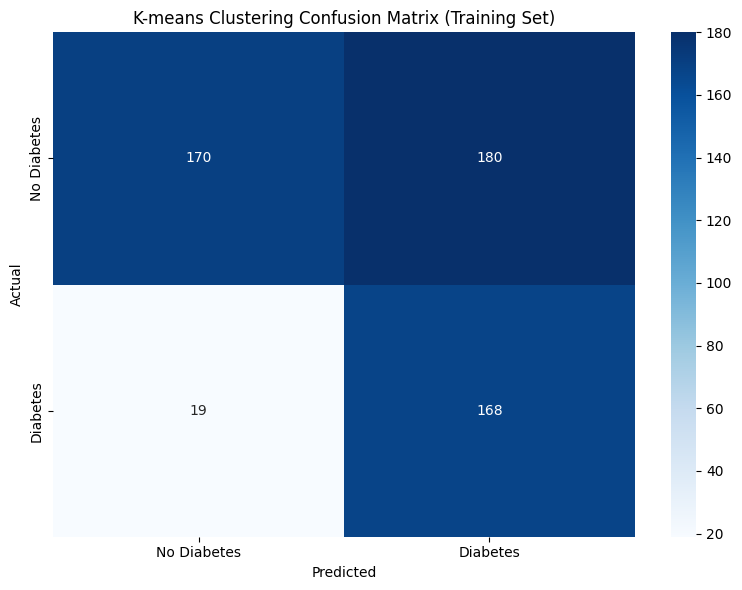

              precision    recall  f1-score   support

           0       0.90      0.49      0.63       350
           1       0.48      0.90      0.63       187

    accuracy                           0.63       537
   macro avg       0.69      0.69      0.63       537
weighted avg       0.75      0.63      0.63       537

Training Balanced Accuracy: 0.6921

Validation Set Performance:


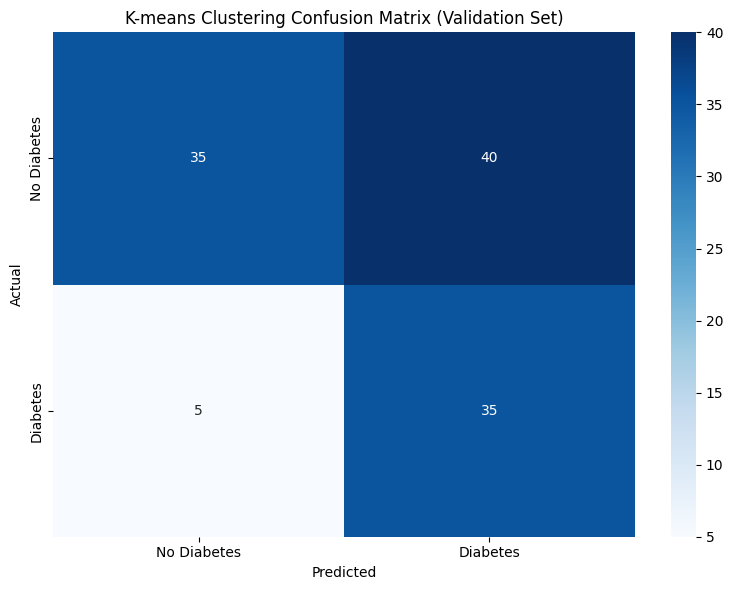

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        75
           1       0.47      0.88      0.61        40

    accuracy                           0.61       115
   macro avg       0.67      0.67      0.61       115
weighted avg       0.73      0.61      0.61       115

Validation Balanced Accuracy: 0.6708

Test Set Performance (Final Evaluation):


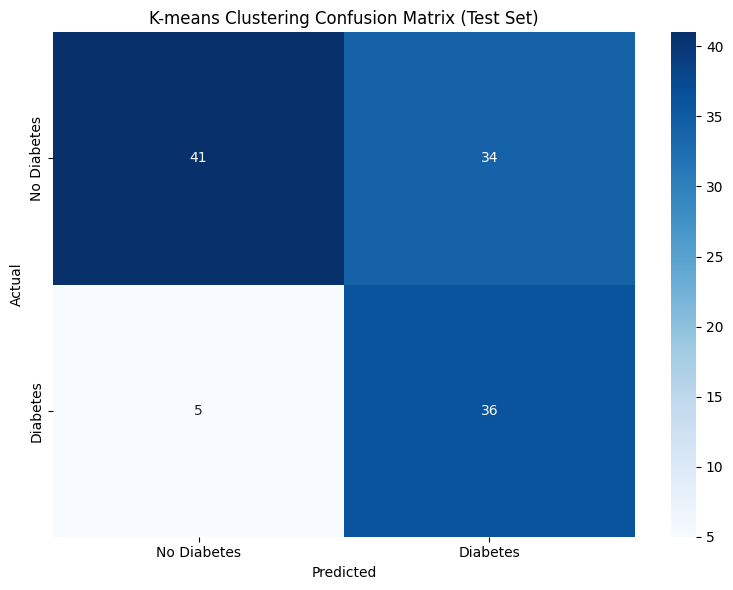

              precision    recall  f1-score   support

           0       0.89      0.55      0.68        75
           1       0.51      0.88      0.65        41

    accuracy                           0.66       116
   macro avg       0.70      0.71      0.66       116
weighted avg       0.76      0.66      0.67       116

Test Balanced Accuracy: 0.7124

PERFORMANCE SUMMARY
Training Balanced Accuracy: 0.6921
Validation Balanced Accuracy: 0.6708
Test Balanced Accuracy: 0.7124

No significant overfitting detected


In [ ]:
# Analyze diabetes prevalence by K-means cluster (on training data)
print("\nDiabetes prevalence by K-means cluster (Training Data):")
train_cluster_stats = []
for cluster in range(optimal_k):
    cluster_data = train_with_kmeans[train_with_kmeans['KMeans_Cluster'] == cluster]
    size = len(cluster_data)
    size_percent = (size / len(train_with_kmeans)) * 100
    diabetic_count = cluster_data['Outcome'].sum()
    diabetic_percent = (diabetic_count / size) * 100 if size > 0 else 0

    train_cluster_stats.append({
        'Cluster': cluster,
        'Size': size,
        'Size_Percent': size_percent,
        'Diabetic_Count': diabetic_count,
        'Diabetic_Percent': diabetic_percent
    })

    print(f"Cluster {cluster}: {size} patients ({size_percent:.1f}% of training data)")
    print(f"    • Diabetic: {diabetic_count} patients ({diabetic_percent:.2f}%)")
    print(f"    • Non-diabetic: {size - diabetic_count} patients ({100-diabetic_percent:.2f}%)")

# Sort clusters by diabetes rate
train_cluster_stats.sort(key=lambda x: x['Diabetic_Percent'], reverse=True)
high_risk_cluster = train_cluster_stats[0]['Cluster']
low_risk_cluster = train_cluster_stats[-1]['Cluster']

print(f"\nHighest-risk cluster: Cluster {high_risk_cluster} with {train_cluster_stats[0]['Diabetic_Percent']:.2f}% diabetic patients")
print(f"Lowest-risk cluster: Cluster {low_risk_cluster} with {train_cluster_stats[-1]['Diabetic_Percent']:.2f}% diabetic patients")

# Use baseline diabetes rate for balanced predictions
baseline_rate = processed_data['overall_diabetes_rate']
print(f"\nUsing baseline diabetes rate: {baseline_rate:.3f} for cluster mapping")

# Function to create predictions based on cluster diabetes rates
def create_cluster_predictions(cluster_labels, cluster_stats, baseline_rate):
    predictions = np.zeros_like(cluster_labels)
    for stat in cluster_stats:
        cluster_id = stat['Cluster']
        # Predict diabetes if cluster rate exceeds baseline rate
        if stat['Diabetic_Percent'] / 100 > baseline_rate:
            predictions[cluster_labels == cluster_id] = 1
    return predictions

# Create predictions for each dataset
train_predictions = create_cluster_predictions(train_kmeans_labels, train_cluster_stats, baseline_rate)
val_predictions = create_cluster_predictions(val_kmeans_labels, train_cluster_stats, baseline_rate)
test_predictions = create_cluster_predictions(test_kmeans_labels, train_cluster_stats, baseline_rate)

# Evaluate on each dataset
print("\n" + "="*50)
print("K-MEANS CLUSTERING RESULTS")
print("="*50)

# Training set evaluation
print("\nTraining Set Performance:")
train_cm = confusion_matrix(processed_data['train']['outcome'], train_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('K-means Clustering Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['train']['outcome'], train_predictions))
train_balanced_acc = balanced_accuracy_score(processed_data['train']['outcome'], train_predictions)
print(f"Training Balanced Accuracy: {train_balanced_acc:.4f}")

# Validation set evaluation
print("\nValidation Set Performance:")
val_cm = confusion_matrix(processed_data['validation']['outcome'], val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('K-means Clustering Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['validation']['outcome'], val_predictions))
val_balanced_acc = balanced_accuracy_score(processed_data['validation']['outcome'], val_predictions)
print(f"Validation Balanced Accuracy: {val_balanced_acc:.4f}")

# Test set evaluation (final evaluation)
print("\nTest Set Performance (Final Evaluation):")
test_cm = confusion_matrix(processed_data['test']['outcome'], test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('K-means Clustering Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['test']['outcome'], test_predictions))
test_balanced_acc = balanced_accuracy_score(processed_data['test']['outcome'], test_predictions)
print(f"Test Balanced Accuracy: {test_balanced_acc:.4f}")

# Summary of performance across all sets
print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)
print(f"Training Balanced Accuracy: {train_balanced_acc:.4f}")
print(f"Validation Balanced Accuracy: {val_balanced_acc:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_acc:.4f}")

# Check if there's overfitting
if train_balanced_acc - val_balanced_acc > 0.05:
    print("\nWarning: Possible overfitting detected (training performance significantly better than validation)")
else:
    print("\nNo significant overfitting detected")

## Confusion Matrix Hierarchical Clustering


Diabetes prevalence by hierarchical cluster (Training Data):

Top 5 highest-risk hierarchical clusters:
Cluster 26: 7 patients (1.3% of training data), 85.71% diabetic
Cluster 21: 6 patients (1.1% of training data), 83.33% diabetic
Cluster 28: 6 patients (1.1% of training data), 83.33% diabetic
Cluster 30: 12 patients (2.2% of training data), 83.33% diabetic
Cluster 13: 8 patients (1.5% of training data), 75.00% diabetic

Top 5 lowest-risk hierarchical clusters:
Cluster 35: 15 patients (2.8% of training data), 0.00% diabetic
Cluster 4: 22 patients (4.1% of training data), 0.00% diabetic
Cluster 2: 16 patients (3.0% of training data), 0.00% diabetic
Cluster 3: 35 patients (6.5% of training data), 2.86% diabetic
Cluster 6: 23 patients (4.3% of training data), 4.35% diabetic

Using baseline diabetes rate: 0.349 for cluster mapping

HIERARCHICAL CLUSTERING RESULTS

Training Set Performance:


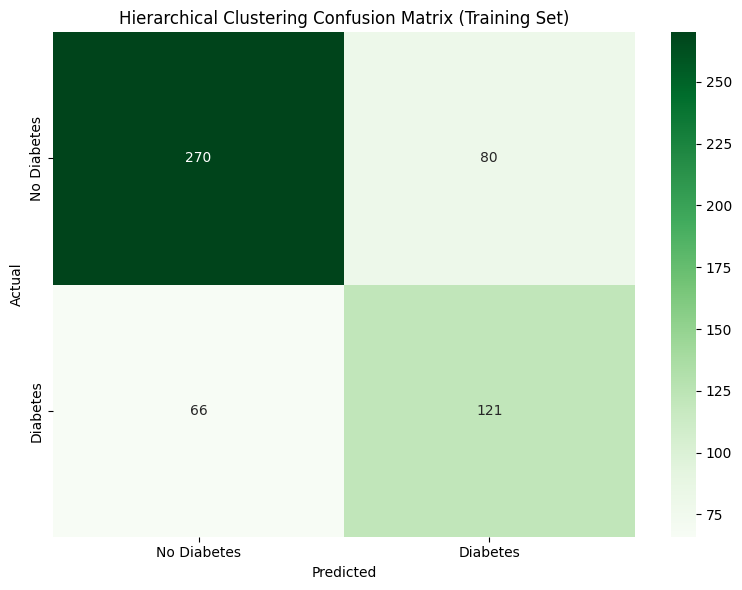

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       350
           1       0.60      0.65      0.62       187

    accuracy                           0.73       537
   macro avg       0.70      0.71      0.71       537
weighted avg       0.73      0.73      0.73       537

Training Balanced Accuracy: 0.7092

Validation Set Performance:


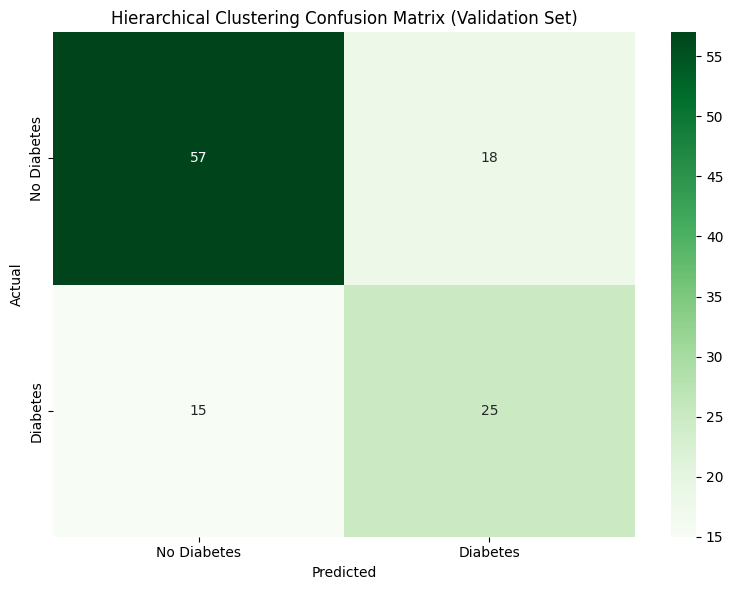

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        75
           1       0.58      0.62      0.60        40

    accuracy                           0.71       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.72      0.71      0.72       115

Validation Balanced Accuracy: 0.6925

Test Set Performance:


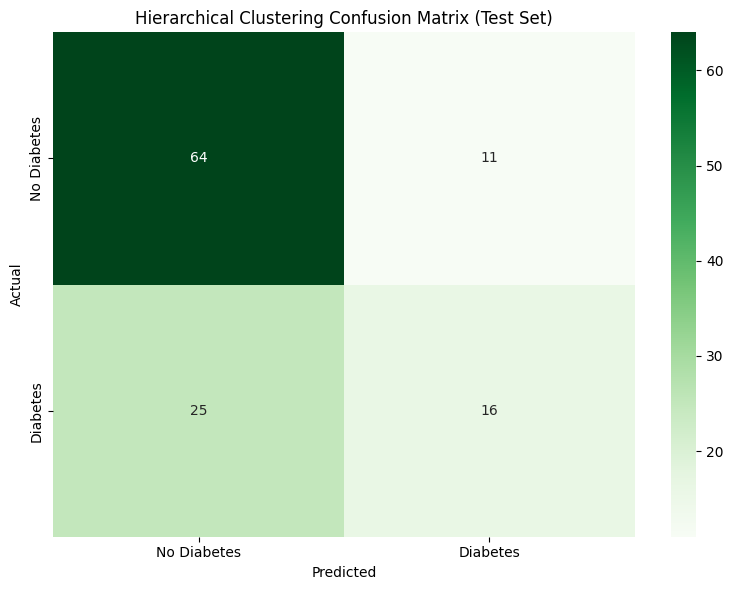

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        75
           1       0.59      0.39      0.47        41

    accuracy                           0.69       116
   macro avg       0.66      0.62      0.63       116
weighted avg       0.67      0.69      0.67       116

Test Balanced Accuracy: 0.6218

HIERARCHICAL CLUSTERING PERFORMANCE SUMMARY
Training Balanced Accuracy: 0.7092
Validation Balanced Accuracy: 0.6925
Test Balanced Accuracy: 0.6218

No significant overfitting detected


In [ ]:
# Analyze diabetes prevalence by hierarchical cluster (on training data)
print("\nDiabetes prevalence by hierarchical cluster (Training Data):")
train_hier_cluster_stats = []
for cluster in np.unique(train_cluster_labels):
    cluster_data = train_with_clusters[train_with_clusters['Hierarchical_Cluster'] == cluster]
    size = len(cluster_data)

    # Skip very small clusters for readability
    if size < len(train_with_clusters) * 0.01:  # Less than 1% of training data
        continue

    size_percent = (size / len(train_with_clusters)) * 100
    diabetic_count = cluster_data['Outcome'].sum()
    diabetic_percent = (diabetic_count / size) * 100 if size > 0 else 0

    train_hier_cluster_stats.append({
        'Cluster': cluster,
        'Size': size,
        'Size_Percent': size_percent,
        'Diabetic_Count': diabetic_count,
        'Diabetic_Percent': diabetic_percent
    })

# Sort hierarchical clusters by diabetes rate
train_hier_cluster_stats.sort(key=lambda x: x['Diabetic_Percent'], reverse=True)

# Display top 5 highest and lowest risk clusters
print("\nTop 5 highest-risk hierarchical clusters:")
for i, stat in enumerate(train_hier_cluster_stats[:5]):
    print(f"Cluster {stat['Cluster']}: {stat['Size']} patients ({stat['Size_Percent']:.1f}% of training data), "
          f"{stat['Diabetic_Percent']:.2f}% diabetic")

print("\nTop 5 lowest-risk hierarchical clusters:")
for i, stat in enumerate(reversed(train_hier_cluster_stats[-5:])):
    print(f"Cluster {stat['Cluster']}: {stat['Size']} patients ({stat['Size_Percent']:.1f}% of training data), "
          f"{stat['Diabetic_Percent']:.2f}% diabetic")

# Use baseline diabetes rate for balanced predictions
baseline_rate = processed_data['overall_diabetes_rate']
print(f"\nUsing baseline diabetes rate: {baseline_rate:.3f} for cluster mapping")

# Function to create hierarchical predictions
def create_hier_cluster_predictions(cluster_labels, cluster_stats, baseline_rate):
    predictions = np.zeros_like(cluster_labels)
    for stat in cluster_stats:
        cluster_id = stat['Cluster']
        # Predict diabetes if cluster rate exceeds baseline rate
        if stat['Diabetic_Percent'] / 100 > baseline_rate:
            predictions[cluster_labels == cluster_id] = 1
    return predictions

# Create predictions for each dataset
train_hier_predictions = create_hier_cluster_predictions(
    train_cluster_labels, train_hier_cluster_stats, baseline_rate)
val_hier_predictions = create_hier_cluster_predictions(
    val_cluster_labels, train_hier_cluster_stats, baseline_rate)
test_hier_predictions = create_hier_cluster_predictions(
    test_cluster_labels, train_hier_cluster_stats, baseline_rate)

# Evaluate on each dataset
print("\n" + "="*50)
print("HIERARCHICAL CLUSTERING RESULTS")
print("="*50)

# Training set evaluation
print("\nTraining Set Performance:")
train_hier_cm = confusion_matrix(processed_data['train']['outcome'], train_hier_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(train_hier_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Hierarchical Clustering Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['train']['outcome'], train_hier_predictions))
train_hier_balanced_acc = balanced_accuracy_score(
    processed_data['train']['outcome'], train_hier_predictions)
print(f"Training Balanced Accuracy: {train_hier_balanced_acc:.4f}")

# Validation set evaluation
print("\nValidation Set Performance:")
val_hier_cm = confusion_matrix(processed_data['validation']['outcome'], val_hier_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(val_hier_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Hierarchical Clustering Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['validation']['outcome'], val_hier_predictions))
val_hier_balanced_acc = balanced_accuracy_score(
    processed_data['validation']['outcome'], val_hier_predictions)
print(f"Validation Balanced Accuracy: {val_hier_balanced_acc:.4f}")

# Test set evaluation
print("\nTest Set Performance:")
test_hier_cm = confusion_matrix(processed_data['test']['outcome'], test_hier_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(test_hier_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Hierarchical Clustering Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(processed_data['test']['outcome'], test_hier_predictions))
test_hier_balanced_acc = balanced_accuracy_score(
    processed_data['test']['outcome'], test_hier_predictions)
print(f"Test Balanced Accuracy: {test_hier_balanced_acc:.4f}")

# Summary of performance across all sets
print("\n" + "="*50)
print("HIERARCHICAL CLUSTERING PERFORMANCE SUMMARY")
print("="*50)
print(f"Training Balanced Accuracy: {train_hier_balanced_acc:.4f}")
print(f"Validation Balanced Accuracy: {val_hier_balanced_acc:.4f}")
print(f"Test Balanced Accuracy: {test_hier_balanced_acc:.4f}")

# Check if there's overfitting
if train_hier_balanced_acc - val_hier_balanced_acc > 0.05:
    print("\nWarning: Possible overfitting detected")
else:
    print("\nNo significant overfitting detected")

## Comparison of Clustering Methods



CLUSTERING PERFORMANCE COMPARISON

Balanced Accuracy Scores:
----------------------------------------
Dataset      | K-means  | Hierarchical
----------------------------------------
Training     | 0.6921  | 0.7092
Validation   | 0.6708  | 0.6925
Test         | 0.7124  | 0.6218
----------------------------------------

Based on test set balanced accuracy, K-means clustering performed better
(0.7124 vs 0.6218)


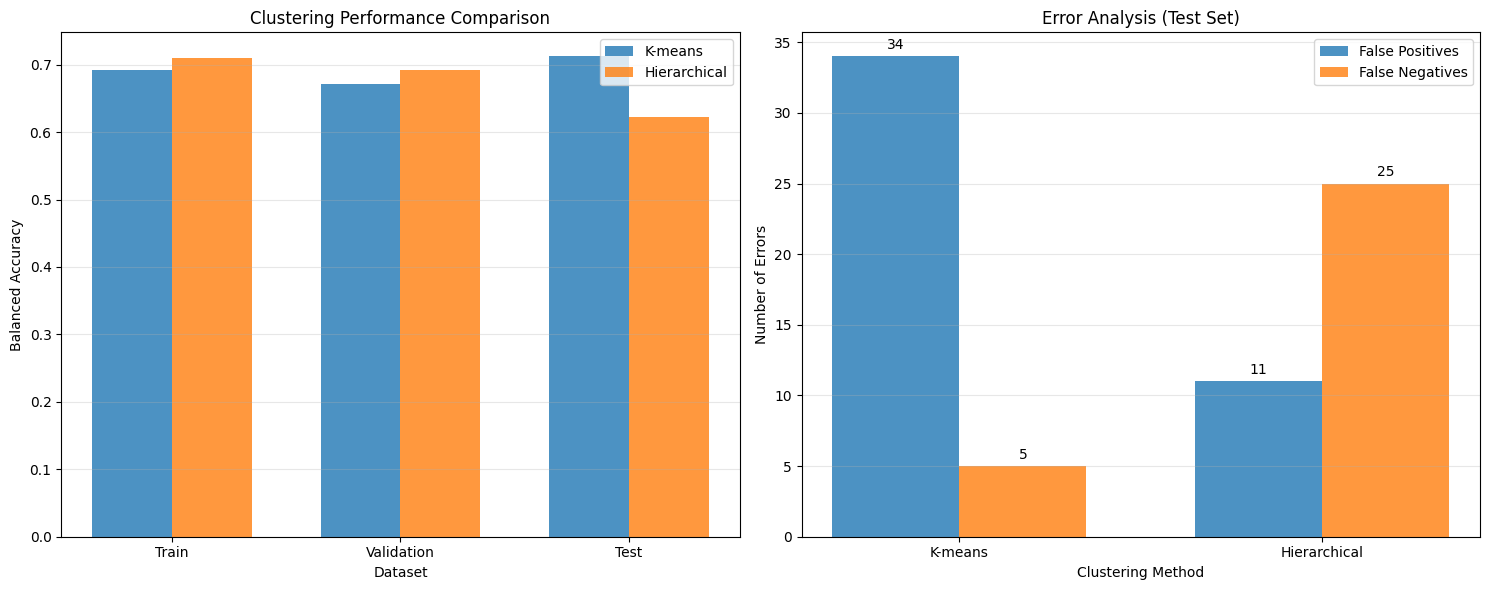


FINAL SUMMARY
Best performing method: K-means
Test set balanced accuracy: 0.7124


In [ ]:
# Compare prediction performance
print("\n" + "="*60)
print("CLUSTERING PERFORMANCE COMPARISON")
print("="*60)

# Show performance for both methods across all datasets
print("\nBalanced Accuracy Scores:")
print("-" * 40)
print("Dataset      | K-means  | Hierarchical")
print("-" * 40)
print(f"Training     | {train_balanced_acc:.4f}  | {train_hier_balanced_acc:.4f}")
print(f"Validation   | {val_balanced_acc:.4f}  | {val_hier_balanced_acc:.4f}")
print(f"Test         | {test_balanced_acc:.4f}  | {test_hier_balanced_acc:.4f}")
print("-" * 40)

# Determine which method performed better on test set
if test_balanced_acc > test_hier_balanced_acc:
    better_method = "K-means"
    better_score = test_balanced_acc
    worse_score = test_hier_balanced_acc
else:
    better_method = "Hierarchical"
    better_score = test_hier_balanced_acc
    worse_score = test_balanced_acc

print(f"\nBased on test set balanced accuracy, {better_method} clustering performed better")
print(f"({better_score:.4f} vs {worse_score:.4f})")


# Visualize the differences
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means performance across datasets
datasets = ['Train', 'Validation', 'Test']
kmeans_scores = [train_balanced_acc, val_balanced_acc, test_balanced_acc]
hier_scores = [train_hier_balanced_acc, val_hier_balanced_acc, test_hier_balanced_acc]

x = np.arange(len(datasets))
width = 0.35

ax1.bar(x - width/2, kmeans_scores, width, label='K-means', alpha=0.8)
ax1.bar(x + width/2, hier_scores, width, label='Hierarchical', alpha=0.8)
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Balanced Accuracy')
ax1.set_title('Clustering Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Error analysis
methods = ['K-means', 'Hierarchical']
errors = []
for method in methods:
    if method == 'K-means':
        pred = test_predictions
    else:
        pred = test_hier_predictions

    actual = processed_data['test']['outcome']
    fp = ((pred == 1) & (actual == 0)).sum()
    fn = ((pred == 0) & (actual == 1)).sum()
    errors.append([fp, fn])

errors = np.array(errors)
error_types = ['False Positives', 'False Negatives']

x = np.arange(len(methods))
width = 0.35

bars1 = ax2.bar(x - width/2, errors[:, 0], width, label=error_types[0], alpha=0.8)
bars2 = ax2.bar(x + width/2, errors[:, 1], width, label=error_types[1], alpha=0.8)

ax2.set_xlabel('Clustering Method')
ax2.set_ylabel('Number of Errors')
ax2.set_title('Error Analysis (Test Set)')
ax2.set_xticks(x)
ax2.set_xticklabels(methods)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)
print(f"Best performing method: {better_method}")
print(f"Test set balanced accuracy: {better_score:.4f}")

# Association Rules

In [ ]:
df['High_Glucose'] = (df['Glucose'] > 130).astype(int)
df['High_BloodPressure'] = (df['BloodPressure'] > 80).astype(int)
df['High_BMI'] = (df['BMI'] > 30).astype(int)
df['High_Insulin'] = (df['Insulin'] > 200).astype(int)
df['Obese'] = (df['BMI'] > 35).astype(int)
df['Has_Diabetes'] = df['Outcome']

# Create Binary Matrix with Selected Columns Only
binary_matrix = df[['High_Glucose', 'High_BloodPressure', 'High_BMI', 'High_Insulin', 'Obese', 'Has_Diabetes']]
binary_matrix.head()

,High_Glucose,High_BloodPressure,High_BMI,High_Insulin,Obese,Has_Diabetes
0,1,0,1,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,1
3,0,0,0,0,0,0
4,1,0,1,0,1,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_Glucose,High_BloodPressure,High_BMI,High_Insulin,Obese,Has_Diabetes
0,6,148.0,72.0,35,125,33.6,0.627,50,1,1,0,1,0,0,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0,0,0,0,0,0,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1,1,0,0,0,0,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0,0,0,0,0,0,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1,1,0,1,0,1,1


In [ ]:
# Apriori expects boolean DataFrame
frequent_itemsets = apriori(binary_matrix, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
2,0.619792,(High_BMI)
5,0.348958,(Has_Diabetes)
0,0.326823,(High_Glucose)
4,0.317708,(Obese)
13,0.317708,"(Obese, High_BMI)"
14,0.282552,"(Has_Diabetes, High_BMI)"
7,0.240885,"(High_BMI, High_Glucose)"
1,0.214844,(High_BloodPressure)
9,0.207031,"(Has_Diabetes, High_Glucose)"
17,0.175781,"(Has_Diabetes, High_BMI, High_Glucose)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.sort_values(by="lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
28,"(High_Glucose, High_BMI)",(Has_Diabetes),0.240885,0.348958,0.175781,0.729730,2.091166,1.0,0.091722,2.408854,0.687377,0.424528,0.584865,0.616731
29,(Has_Diabetes),"(High_Glucose, High_BMI)",0.348958,0.240885,0.175781,0.503731,2.091166,1.0,0.091722,1.529644,0.801481,0.424528,0.346253,0.616731
34,"(High_BloodPressure, High_BMI)",(Obese),0.165365,0.317708,0.105469,0.637795,2.007487,1.0,0.052931,1.883718,0.601298,0.279310,0.469135,0.484881
35,(Obese),"(High_BloodPressure, High_BMI)",0.317708,0.165365,0.105469,0.331967,2.007487,1.0,0.052931,1.249393,0.735557,0.279310,0.199611,0.484881
26,"(High_BMI, Has_Diabetes)",(High_Glucose),0.282552,0.326823,0.175781,0.622120,1.903538,1.0,0.083437,1.781456,0.661598,0.405405,0.438662,0.579984
31,(High_Glucose),"(High_BMI, Has_Diabetes)",0.326823,0.282552,0.175781,0.537849,1.903538,1.0,0.083437,1.552409,0.705108,0.405405,0.355840,0.579984
7,(High_Glucose),(Has_Diabetes),0.326823,0.348958,0.207031,0.633466,1.815306,1.0,0.092984,1.776212,0.667178,0.441667,0.437004,0.613375
6,(Has_Diabetes),(High_Glucose),0.348958,0.326823,0.207031,0.593284,1.815306,1.0,0.092984,1.655151,0.689862,0.441667,0.395826,0.613375
23,(Obese),"(High_Glucose, High_BMI)",0.317708,0.240885,0.130208,0.409836,1.701374,1.0,0.053677,1.286277,0.604198,0.303951,0.222563,0.475188
22,"(High_Glucose, High_BMI)",(Obese),0.240885,0.317708,0.130208,0.540541,1.701374,1.0,0.053677,1.484988,0.543053,0.303951,0.326594,0.475188


In [ ]:
diabetes_rules = rules[rules['consequents'].astype(str).str.contains("Has_Diabetes")]
diabetes_rules = diabetes_rules.sort_values(by="lift", ascending=False)

# Show top 5
diabetes_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
28,"(High_Glucose, High_BMI)",(Has_Diabetes),0.175781,0.729730,2.091166
31,(High_Glucose),"(High_BMI, Has_Diabetes)",0.175781,0.537849,1.903538
7,(High_Glucose),(Has_Diabetes),0.207031,0.633466,1.815306
41,(Obese),"(High_BMI, Has_Diabetes)",0.149740,0.471311,1.668052
43,(High_BMI),"(Obese, Has_Diabetes)",0.149740,0.241597,1.613445
30,(High_BMI),"(High_Glucose, Has_Diabetes)",0.175781,0.283613,1.369906
39,"(Obese, High_BMI)",(Has_Diabetes),0.149740,0.471311,1.350624
18,(Obese),(Has_Diabetes),0.149740,0.471311,1.350624
12,(High_BloodPressure),(Has_Diabetes),0.100260,0.466667,1.337313
17,(High_BMI),(Has_Diabetes),0.282552,0.455882,1.306409


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(10)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(10))

                       antecedents               consequents   support  \
13                  (Has_Diabetes)  (High_Glucose, High_BMI)  0.175781   
12        (High_Glucose, High_BMI)            (Has_Diabetes)  0.175781   
16  (High_BloodPressure, High_BMI)                   (Obese)  0.105469   
10        (High_BMI, Has_Diabetes)            (High_Glucose)  0.175781   
14                  (High_Glucose)  (High_BMI, Has_Diabetes)  0.175781   
3                   (High_Glucose)            (Has_Diabetes)  0.207031   
2                   (Has_Diabetes)            (High_Glucose)  0.207031   
9         (High_Glucose, High_BMI)                   (Obese)  0.130208   
18        (High_BMI, Has_Diabetes)                   (Obese)  0.149740   
5                          (Obese)                (High_BMI)  0.317708   

    confidence      lift  representativity  leverage  zhangs_metric   jaccard  \
13    0.503731  2.091166               1.0  0.091722       0.801481  0.424528   
12    0.729730  2.09116

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[rules['consequents'] == {'Has_Diabetes'}]

# Step 2: Create a set of antecedents that imply 'Has_Diabetes'
diabetes_antecedents = [set(rule) for rule in rules['antecedents']]

# Step 3: Predict diabetes if any antecedent matches for a row
def predict_diabetes(row):
    for antecedent in diabetes_antecedents:
        if all(row[list(antecedent)] == 1):
            return 1
    return 0

y_true = binary_matrix['Has_Diabetes']
y_pred = binary_matrix.apply(predict_diabetes, axis=1)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Confusion Matrix:
 [[408  92]
 [109 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       500
           1       0.63      0.59      0.61       268

    accuracy                           0.74       768
   macro avg       0.71      0.70      0.71       768
weighted avg       0.73      0.74      0.74       768



============================================================

FINAL SUMMARY

============================================================

Accuracy: 0.74

Lift: 2.0911

antecedents: (High_BMI, High_Glucose)

consequents: (Has_Diabetes)

# Voting Ensemble

NaN values in X_train: 34
NaN values in X_test: 10

===== VOTING ENSEMBLE RESULTS =====

Confusion Matrix:


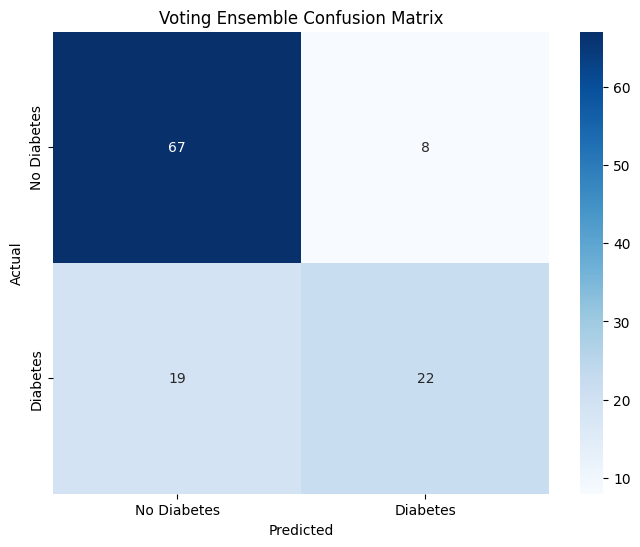


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        75
           1       0.73      0.54      0.62        41

    accuracy                           0.77       116
   macro avg       0.76      0.71      0.73       116
weighted avg       0.76      0.77      0.76       116

Accuracy: 0.7672
Balanced Accuracy: 0.7150
F1 Score: 0.6197

===== COMPARISON WITH INDIVIDUAL MODELS =====
             Model  Accuracy  Balanced Accuracy  F1 Score
0    Decision_Tree  0.732759           0.682764  0.575342
1               NB  0.767241           0.726016  0.640000
2               LR  0.775862           0.716098  0.617647
3  Voting Ensemble  0.767241           0.714959  0.619718

Results with Soft Voting:
             Model  Accuracy  Balanced Accuracy  F1 Score
0    Decision_Tree  0.732759           0.682764  0.575342
1               NB  0.767241           0.726016  0.640000
2               LR  0.775862           0.716098  0.

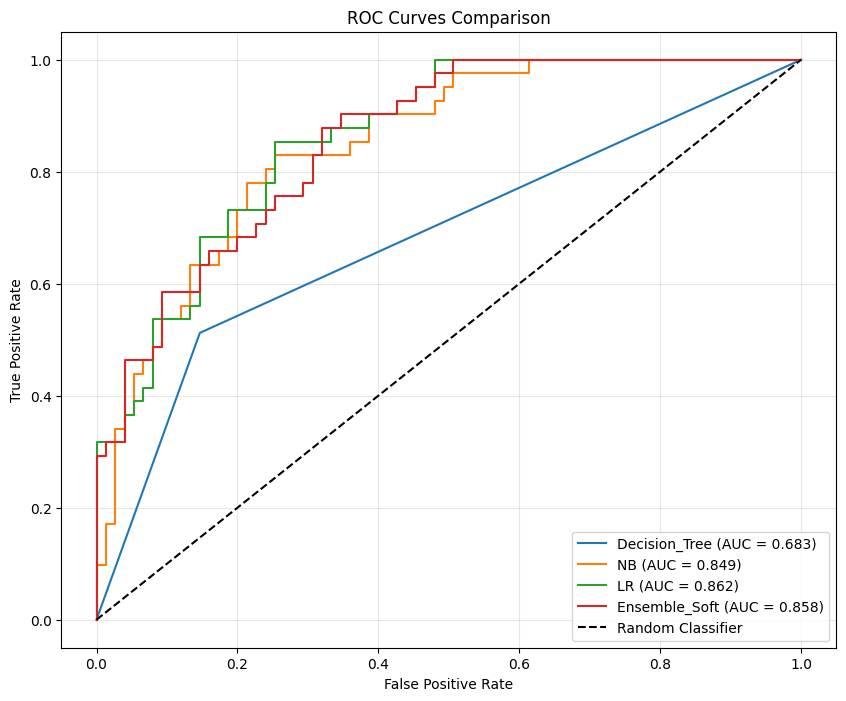

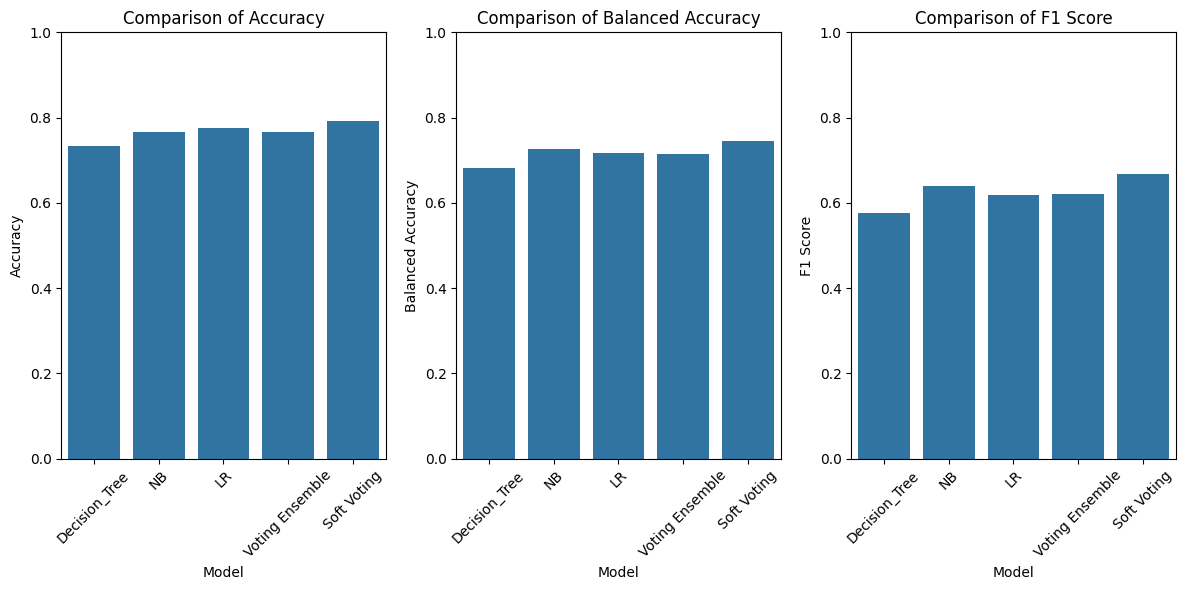


Best model based on balanced accuracy: Soft Voting
Balanced Accuracy: 0.7460
Accuracy: 0.7931
F1 Score: 0.6667


In [ ]:
# Voting Ensemble Implementation with Data Preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Check for NaN values in the training and test data
print("NaN values in X_train:", X_train.isna().sum().sum())
print("NaN values in X_test:", X_test.isna().sum().sum())

# Create an imputer to handle NaN values
imputer = SimpleImputer(strategy='median')

# Apply imputation to training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define individual models
estimators = []
learner_1 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=1)
estimators.append(("Decision_Tree", learner_1))
learner_2 = GaussianNB()
estimators.append(("NB", learner_2))
learner_3 = LogisticRegression(max_iter=1000, random_state=42)
estimators.append(("LR", learner_3))

# Create and train the voting classifier
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train_imputed, y_train)

# Make predictions on test set
y_pred_ensemble = ensemble.predict(X_test_imputed)

# Evaluate ensemble model
print("\n===== VOTING ENSEMBLE RESULTS =====")
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Voting Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ensemble):.4f}")

# Compare with individual models
print("\n===== COMPARISON WITH INDIVIDUAL MODELS =====")

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'F1 Score': []
}

# Train and evaluate individual models
for name, model in estimators:
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))

# Add ensemble results
results['Model'].append('Voting Ensemble')
results['Accuracy'].append(accuracy_score(y_test, y_pred_ensemble))
results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_ensemble))
results['F1 Score'].append(f1_score(y_test, y_pred_ensemble))

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Try soft voting (if all models support predict_proba)
try:
    # Create and train a soft voting classifier
    soft_ensemble = VotingClassifier(estimators, voting='soft')
    soft_ensemble.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred_soft = soft_ensemble.predict(X_test_imputed)

    # Add to results
    results['Model'].append('Soft Voting')
    results['Accuracy'].append(accuracy_score(y_test, y_pred_soft))
    results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_soft))
    results['F1 Score'].append(f1_score(y_test, y_pred_soft))

    # Update DataFrame
    results_df = pd.DataFrame(results)
    print("\nResults with Soft Voting:")
    print(results_df)

    # Compare ROC curves
    plt.figure(figsize=(10, 8))

    # Plot ROC curves for each model
    models = estimators + [('Ensemble_Hard', ensemble), ('Ensemble_Soft', soft_ensemble)]

    for name, model in models:
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test_imputed)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            auc = roc_auc_score(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

except Exception as e:
    print(f"\nCouldn't perform soft voting: {e}")

# Plot comparison of model performances
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Identify best model
best_model_idx = results_df['Balanced Accuracy'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
print(f"\nBest model based on balanced accuracy: {best_model}")
print(f"Balanced Accuracy: {results_df.loc[best_model_idx, 'Balanced Accuracy']:.4f}")
print(f"Accuracy: {results_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"F1 Score: {results_df.loc[best_model_idx, 'F1 Score']:.4f}")

Dataset shape: (537, 8)
Outcome distribution in training set: [350 187]
Outcome distribution in test set: [75 41]

===== FEATURE SELECTION =====
Selected features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Reduced feature set shape: (537, 4)

===== MODEL EVALUATION =====

===== THRESHOLD OPTIMIZATION =====
Optimal threshold: 0.3339

Model Performance Summary:
                             Model  Accuracy  Balanced Accuracy  F1 Score  \
7  Soft Voting (Optimal Threshold)  0.793103           0.795772  0.733333   
2               LogisticRegression  0.793103           0.768130  0.700000   
0                     DecisionTree  0.741379           0.728130  0.651163   
5                      Hard Voting  0.758621           0.713821  0.621622   
6                      Soft Voting  0.758621           0.713821  0.621622   
3                     RandomForest  0.750000           0.707154  0.613333   
1                       NaiveBayes  0.775862           0.710569  0.606061   
4         

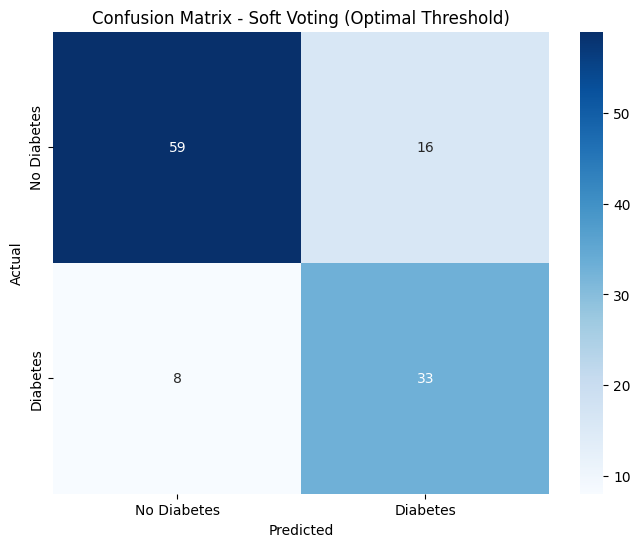

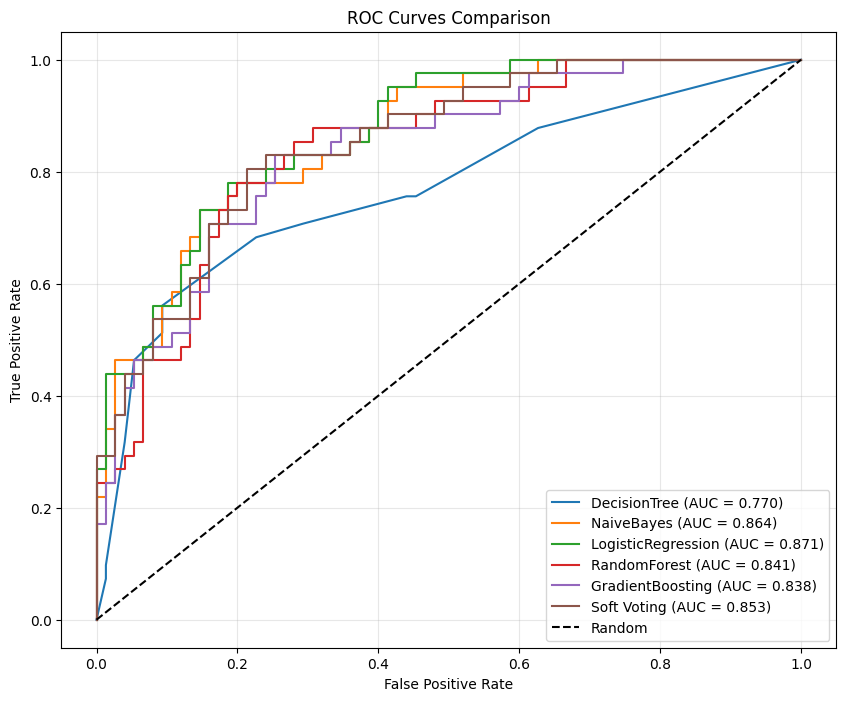

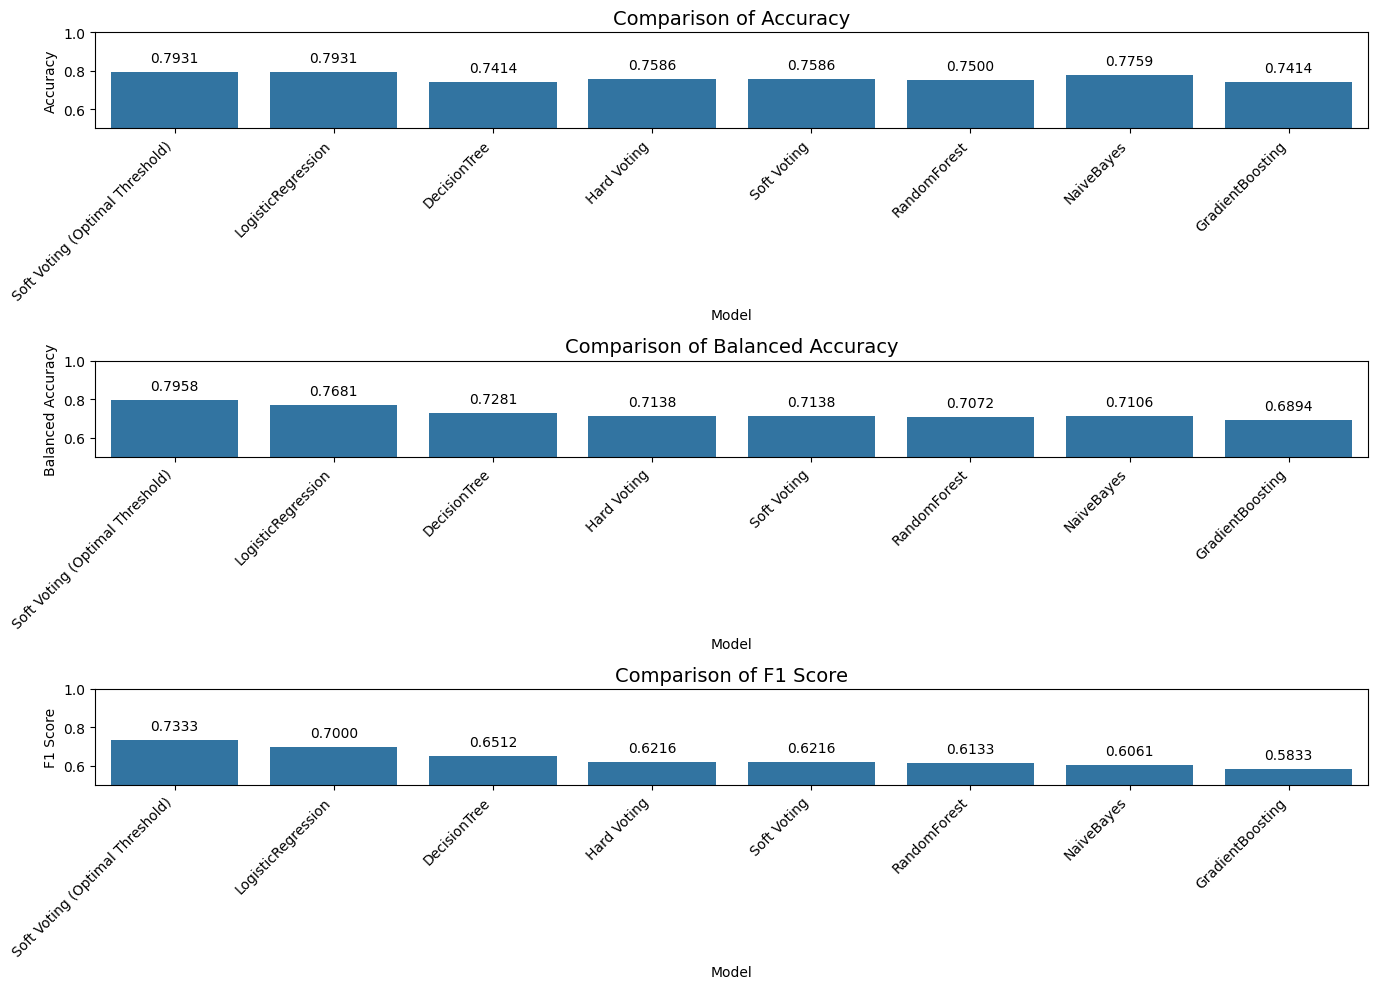


===== FINAL SUMMARY =====
Best model: Soft Voting (Optimal Threshold)
Accuracy: 0.7931
Balanced Accuracy: 0.7958
F1 Score: 0.7333
AUC: 0.8533

Improvement over original soft voting:
Balanced Accuracy: 0.0498 increase
Accuracy: 0.0000 increase
F1 Score: 0.0666 increase


In [ ]:
# Optimized Voting Ensemble Implementation
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Print dataset information
print(f"Dataset shape: {X_train.shape}")
print(f"Outcome distribution in training set: {np.bincount(y_train)}")
print(f"Outcome distribution in test set: {np.bincount(y_test)}")

# Create preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply preprocessing
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Feature selection using RandomForest
print("\n===== FEATURE SELECTION =====")
selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)
selector.fit(X_train_prep, y_train)
selected_features = np.where(selector.get_support())[0]
feature_names = X_train.columns[selected_features]
print(f"Selected features: {feature_names.tolist()}")

# Apply feature selection
X_train_selected = selector.transform(X_train_prep)
X_test_selected = selector.transform(X_test_prep)
print(f"Reduced feature set shape: {X_train_selected.shape}")

# Define optimized base models
dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

nb = GaussianNB(var_smoothing=1e-8)

lr = LogisticRegression(
    C=1.0,
    solver='liblinear',
    penalty='l1',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    random_state=42
)

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)

# Create the optimized ensemble
estimators = [
    ("DecisionTree", dt),
    ("NaiveBayes", nb),
    ("LogisticRegression", lr),
    ("RandomForest", rf),
    ("GradientBoosting", gb)
]

# Train hard voting ensemble
hard_ensemble = VotingClassifier(estimators, voting='hard')
hard_ensemble.fit(X_train_selected, y_train)

# Train soft voting ensemble with calibrated probabilities
soft_ensemble = VotingClassifier(estimators, voting='soft', weights=[1, 1, 2, 3, 3])
soft_ensemble.fit(X_train_selected, y_train)

# Make predictions
y_pred_hard = hard_ensemble.predict(X_test_selected)
y_pred_soft = soft_ensemble.predict(X_test_selected)
y_prob_soft = soft_ensemble.predict_proba(X_test_selected)[:, 1]

# Evaluate base models and ensembles
print("\n===== MODEL EVALUATION =====")
results = {
    'Model': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'F1 Score': [],
    'AUC': []
}

# Evaluate individual models
for name, model in estimators:
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_selected)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = np.nan

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))
    results['AUC'].append(auc)

# Add ensemble results
results['Model'].append('Hard Voting')
results['Accuracy'].append(accuracy_score(y_test, y_pred_hard))
results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_hard))
results['F1 Score'].append(f1_score(y_test, y_pred_hard))
results['AUC'].append(np.nan)  # Hard voting doesn't provide probabilities

results['Model'].append('Soft Voting')
results['Accuracy'].append(accuracy_score(y_test, y_pred_soft))
results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_soft))
results['F1 Score'].append(f1_score(y_test, y_pred_soft))
results['AUC'].append(roc_auc_score(y_test, y_prob_soft))

# Find optimal threshold for soft voting
print("\n===== THRESHOLD OPTIMIZATION =====")
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_soft)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_prob_soft >= optimal_threshold).astype(int)
results['Model'].append('Soft Voting (Optimal Threshold)')
results['Accuracy'].append(accuracy_score(y_test, y_pred_optimal))
results['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_optimal))
results['F1 Score'].append(f1_score(y_test, y_pred_optimal))
results['AUC'].append(roc_auc_score(y_test, y_prob_soft))

# Convert to DataFrame and display results
results_df = pd.DataFrame(results).sort_values('F1 Score', ascending=False)
print("\nModel Performance Summary:")
print(results_df)

# Confusion matrix for best model
best_model_name = results_df.iloc[0]['Model']
best_preds = y_pred_optimal if best_model_name == 'Soft Voting (Optimal Threshold)' else \
             y_pred_soft if best_model_name == 'Soft Voting' else \
             y_pred_hard if best_model_name == 'Hard Voting' else \
             estimators[results_df['Model'].tolist().index(best_model_name)][1].predict(X_test_selected)

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, best_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
models_with_proba = []

# Add individual models with predict_proba
for name, model in estimators:
    if hasattr(model, 'predict_proba'):
        models_with_proba.append((name, model))

# Add soft voting
models_with_proba.append(('Soft Voting', soft_ensemble))

# Plot ROC curves
for name, model in models_with_proba:
    y_prob = model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Plot model comparison
plt.figure(figsize=(14, 10))
metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    ax = sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.5, 1.0)  # Set y-axis to start from 0.5 for better visualization of differences

    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

# Final summary
print("\n===== FINAL SUMMARY =====")
best_idx = results_df.index[0]
best_model = results_df.iloc[0]['Model']
print(f"Best model: {best_model}")
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"Balanced Accuracy: {results_df.iloc[0]['Balanced Accuracy']:.4f}")
print(f"F1 Score: {results_df.iloc[0]['F1 Score']:.4f}")

if 'AUC' in results_df.columns and not np.isnan(results_df.iloc[0]['AUC']):
    print(f"AUC: {results_df.iloc[0]['AUC']:.4f}")

print("\nImprovement over original soft voting:")
orig_balanced_acc = 0.7460
orig_accuracy = 0.7931
orig_f1 = 0.6667
print(f"Balanced Accuracy: {results_df.iloc[0]['Balanced Accuracy'] - orig_balanced_acc:.4f} increase")
print(f"Accuracy: {results_df.iloc[0]['Accuracy'] - orig_accuracy:.4f} increase")
print(f"F1 Score: {results_df.iloc[0]['F1 Score'] - orig_f1:.4f} increase")

# Print feature importance if best model supports it
if best_model in ['RandomForest', 'GradientBoosting', 'DecisionTree']:
    model_idx = [name for name, _ in estimators].index(best_model)
    model = estimators[model_idx][1]

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        print("\nFeature importance ranking:")
        for i, idx in enumerate(indices):
            if idx < len(feature_names):
                print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")